# <b>Project - Featurization, Model Selection & Tuning - AIML - Aishik Sengupta</b>

--------------


## <b><u>Data Description</u></b> :
The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).



## <b><u>Domain</u></b> :
Cement manufacturing



## <b><u>Context</u></b> :
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.


## <b><u>Attribute Information</u></b> :

<ul>
    <li>Cement : measured in kg in a m3 mixture</li>
    <li>Blast : measured in kg in a m3 mixture</li>
    <li>Fly ash : measured in kg in a m3 mixture</li>
    <li>Water : measured in kg in a m3 mixture</li>
    <li>Superplasticizer : measured in kg in a m3 mixture</li>
    <li>Coarse Aggregate : measured in kg in a m3 mixture</li>
    <li>Fine Aggregate : measured in kg in a m3 mixture</li>
    <li>Age : day (1~365)</li>
    <li>Concrete compressive strength measured in MPa</li>
</ul>




## <b><u>Learning Outcomes</u></b>:

<ul>
    <li>Exploratory Data Analysis</li>
    <li>Building ML models for regression</li>
    <li>Hyper parameter tuning</li>
</ul>


## <b><u>Objective</u></b> :

Modelling of strength of high performance concrete using Machine Learning



## <b><u>Steps and tasks</u></b>:

<ol>
    <li>Deliverable -1 (Exploratory data quality report reflecting the following) (20 marks)
        <ul>
            <li>Univariate analysis (5 marks) - data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers</li>
            <li>Multivariate analysis (5 marks) - Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes</li>
            <li>Pick one strategy to address the presence outliers and missing values and perform necessary imputation (10 marks)</li>
        </ul>
    </li>
    <li>Deliverable -2 (Feature Engineering techniques) (15 marks)
        <ul>
            <li>Identify opportunities (if any) to create a composite feature, drop a feature etc. (5 marks)</li>
            <li>Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help (5 marks)</li>
            <li>Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength (5 marks)</li>
        </ul>
    </li>
    <li>Deliverable -3 (create the model ) ( 15 marks)
        <ul>
            <li>Obtain feature importance for the individual features and present your findings</li>
        </ul>
    </li>
    <li>Deliverable -4 (Tuning the model) (20 marks)
        <ul>
            <li>Algorithms that you think will be suitable for this project (5 marks)</li>
            <li>Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit (5 marks)</li>
            <li>Model performance range at 95% confidence level (10 marks)</li>
        </ul>
    </li>
</ol>
<br>
<br>
<br>
<br>
<br>

In [266]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# various scaling algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from scipy.stats import zscore

from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold

from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn.model_selection import cross_val_score # for performing cross validation of models
from sklearn.svm import SVC # Support vector machine model

from sklearn.utils import shuffle
from sklearn import metrics # to get various evaluation metrics
from sklearn.metrics import roc_auc_score # receiver operating curve score

from sklearn.metrics import accuracy_score # accuracy of prediction score
from sklearn.metrics import recall_score # recall score
from sklearn.metrics import precision_score # precision score
from sklearn.metrics import f1_score # f1 score

from sklearn.decomposition import PCA # performing principal components analysis

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor

from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score

In [2]:
# read the dataset to a dataframe
cm_df = pd.read_csv('concrete.csv')

In [3]:
# taking a look at the first 10 rows of the dataframe, already seeing some missing values
cm_df.head(10)

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   
5   255.0    0.0    0.0  192.0           0.0      889.8    945.0   90   
6   166.8  250.2    0.0  203.5           0.0      975.6    692.6    7   
7   251.4    0.0  118.3  188.5           6.4     1028.4    757.7   56   
8   296.0    0.0    0.0  192.0           0.0     1085.0    765.0   28   
9   155.0  184.0  143.0  194.0           9.0      880.0    699.0   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29  
5     21.86  
6     15.75  
7     36.64  
8     21.65  
9     28.99

In [4]:
cm_df.shape # dimensions of the dataframe

(1030, 9)

This is a regression problem containing all 8 predictor variables and a target variable.

In [5]:
# To check for null values
cm_df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There are no null values in the dataset provided to us

In [6]:
cm_df.info() # basic info such as datatype, value types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<ul>
    <li>All are numerical datatypes.</li>
    <li>Eight variables are hainvg 64 bit float datatype</li>
    <li>One variable is having 64 bit integer datatype rightly so since it counting the number of days</li>
</ul>

In [7]:
# Getting the 5 point summary
cm_df.describe().T

count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

<ul>
    <li>Many zero values can be observered for the predictors  - ash, slag and superplastic
    </li>
    <li>Except slag, ash and age, other columns have almost same median and mean values.
    </li>
</ul>

In [8]:
#Checing how many rows have atleast one 0 value
(~cm_df.all(1)).sum() 

805

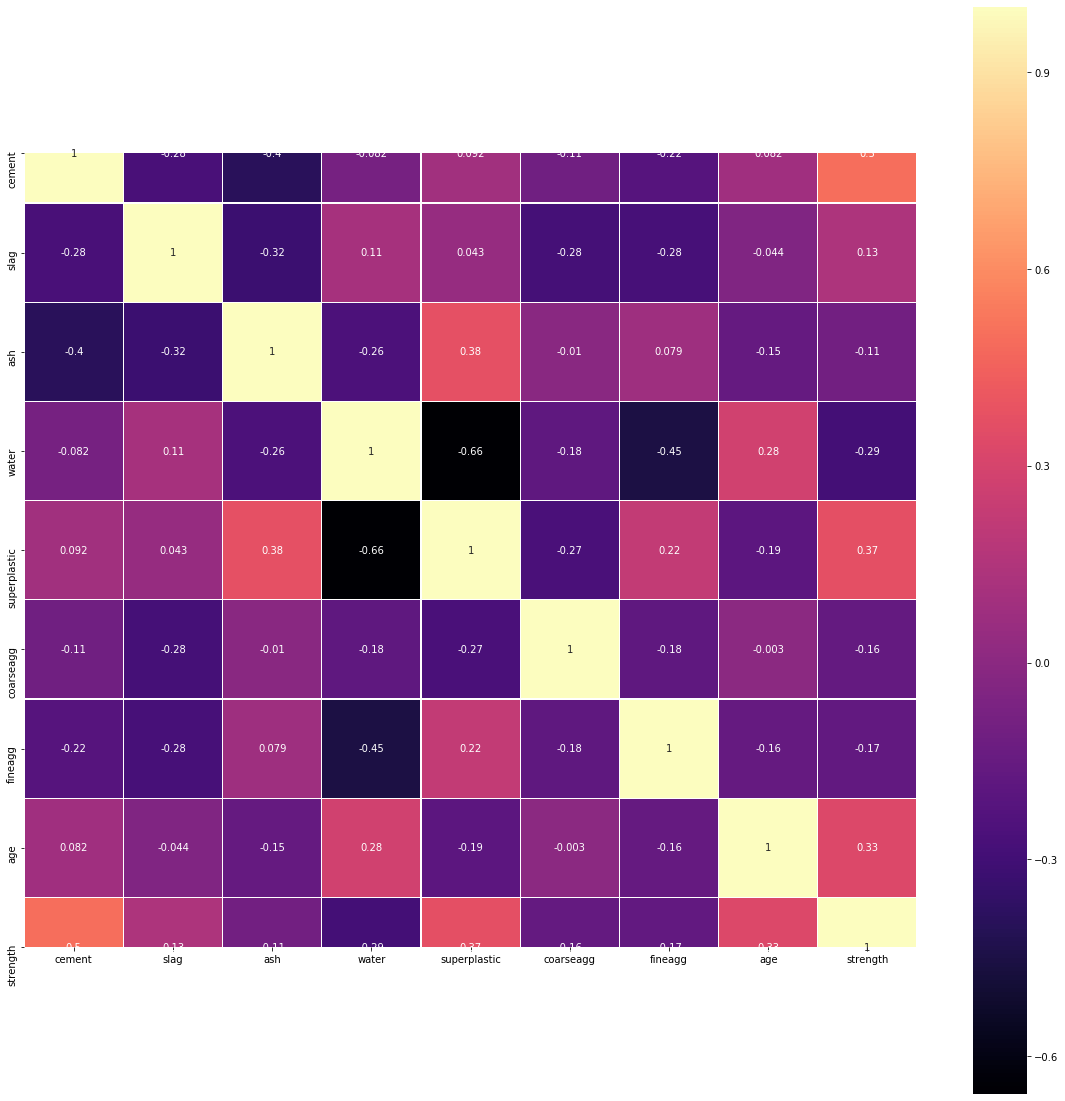

In [8]:
# To check for correlation
colormap = plt.cm.magma
plt.figure(figsize=(20,20))

sns.heatmap(cm_df.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True)

<ul>
    <li>Strength has a good correlation with cement, superplastic and age
    </li>
    <li>Water has a good correlation with fineagg and superplastic
    </li>
</ul>

In [9]:
cm_df.corr()

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water        -0.450661  0.277618 -0.289633  
superplastic  0.222691 -0.192700  0.366079  
coarseagg    -0.178481 -0.003016 -0.164935  
fineagg       1.000000 -0.156095 -0.167241  
age          -0.156095  1.000000  0.328873  
strength     -0.167241  0.328873  1.000000

In [10]:
#cm_df.median()

In [11]:
#To impute missing values
#impute = SimpleImputer( missing_values = 0, strategy='median')
#impute = impute.fit(df[:,0:18])
#cm_df.iloc[:,0:9] = impute.fit_transform(cm_df.iloc[:,0:9])

<br>
<br>

# Exploratory Data Analysis

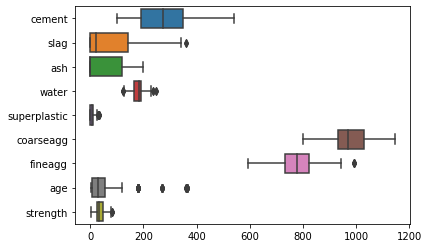

In [12]:
# Doing a boxplot on the whole data to check
sns.boxplot( data=cm_df, orient= "h" )

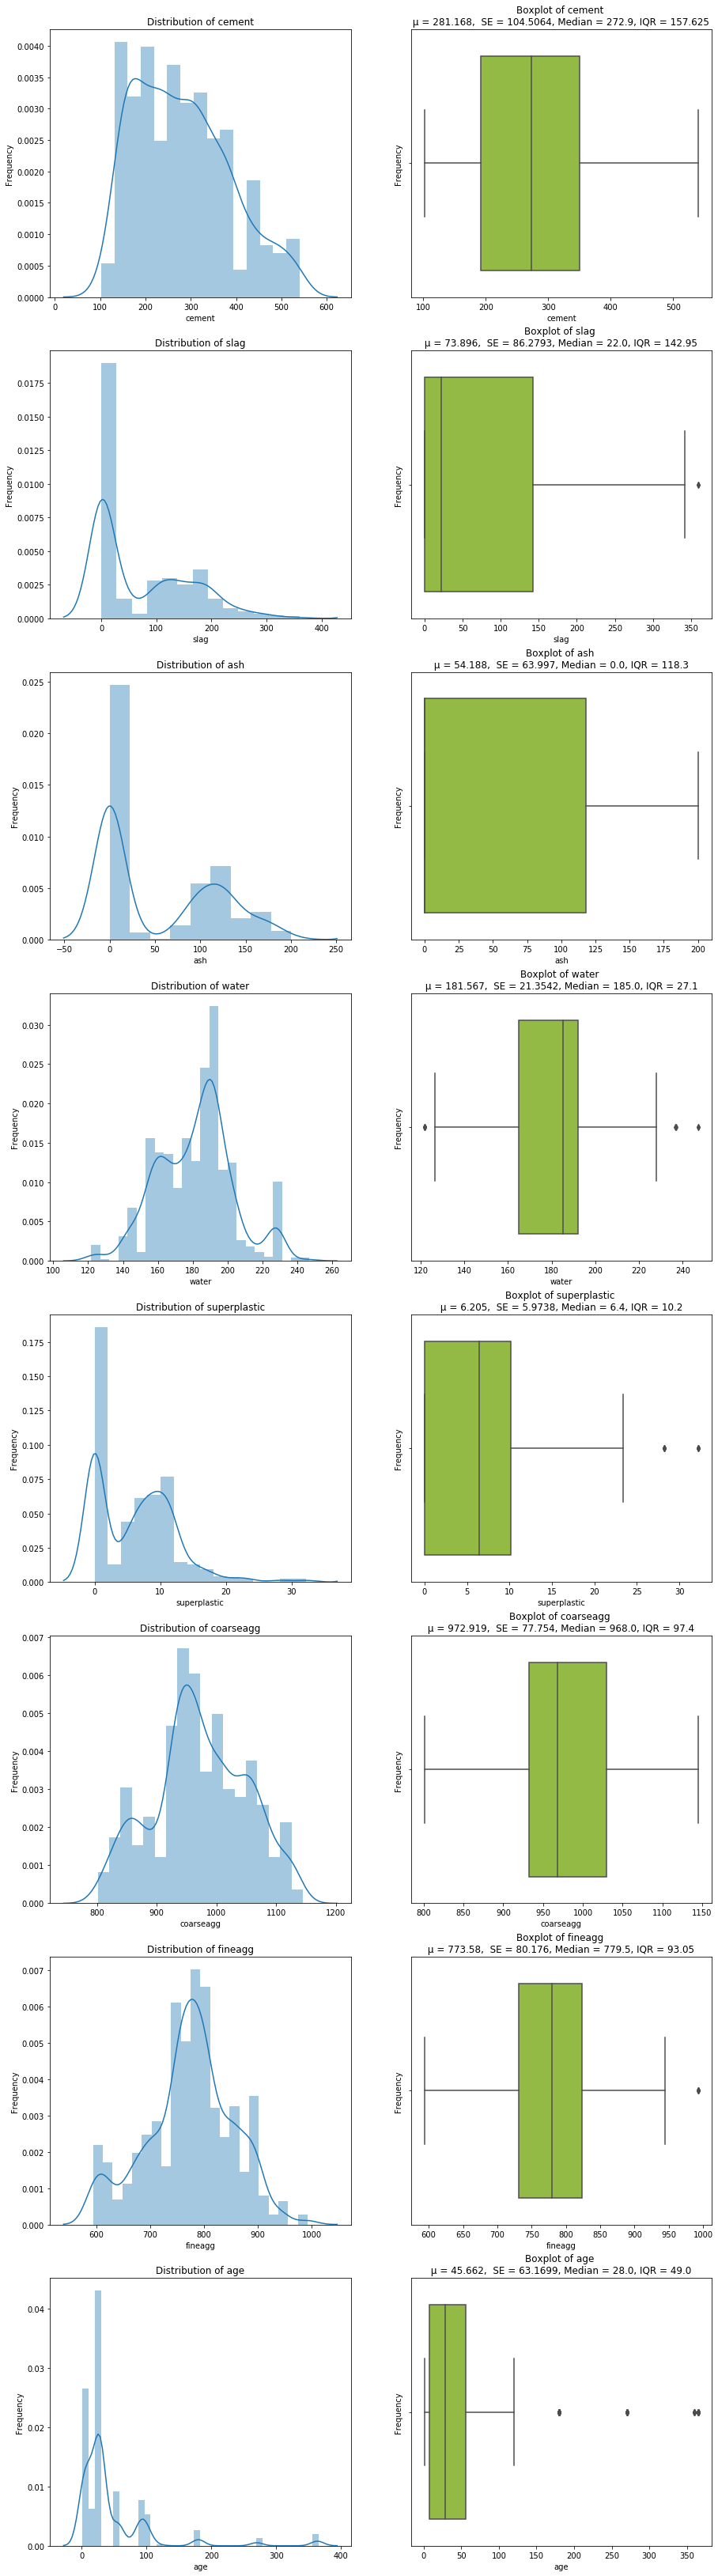

In [13]:
plt.figure(figsize = (15,66))
cols = cm_df.columns.values

i=0 # column counter 
j=1 # plot counter
k=1 # plot counter of each variable

while i < (len(cols) - 1):
    if k == 1:
        plt.subplot(9,2,j)
        sns.distplot(cm_df[cols[i]])
        j+=1
        k+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
    else:
        plt.subplot(9,2,j)
        sns.boxplot(cm_df[cols[i]], color='yellowgreen')
        j+=1
        q1, q3 = np.percentile(cm_df[cols[i]],[25,75])
        IQR = q3 - q1 
        plt.title(f'Boxplot of {cols[i]} \n \u03bc = {round(cm_df[cols[i]].mean(), 3)},  SE = {round(cm_df[cols[i]].std(),4)}, Median = {round(cm_df[cols[i]].median(),3)}, IQR = {round(IQR, 3)} ')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        i+=1
        k=1

<ul>
    <li>Outliers can be observed in slag, water superplastic, fineagg ang age.
    </li>
    <li>A mix of gaussians can be observed in all predictors indicating that data was sourced from different places and consolidated here.
    </li>
</ul>

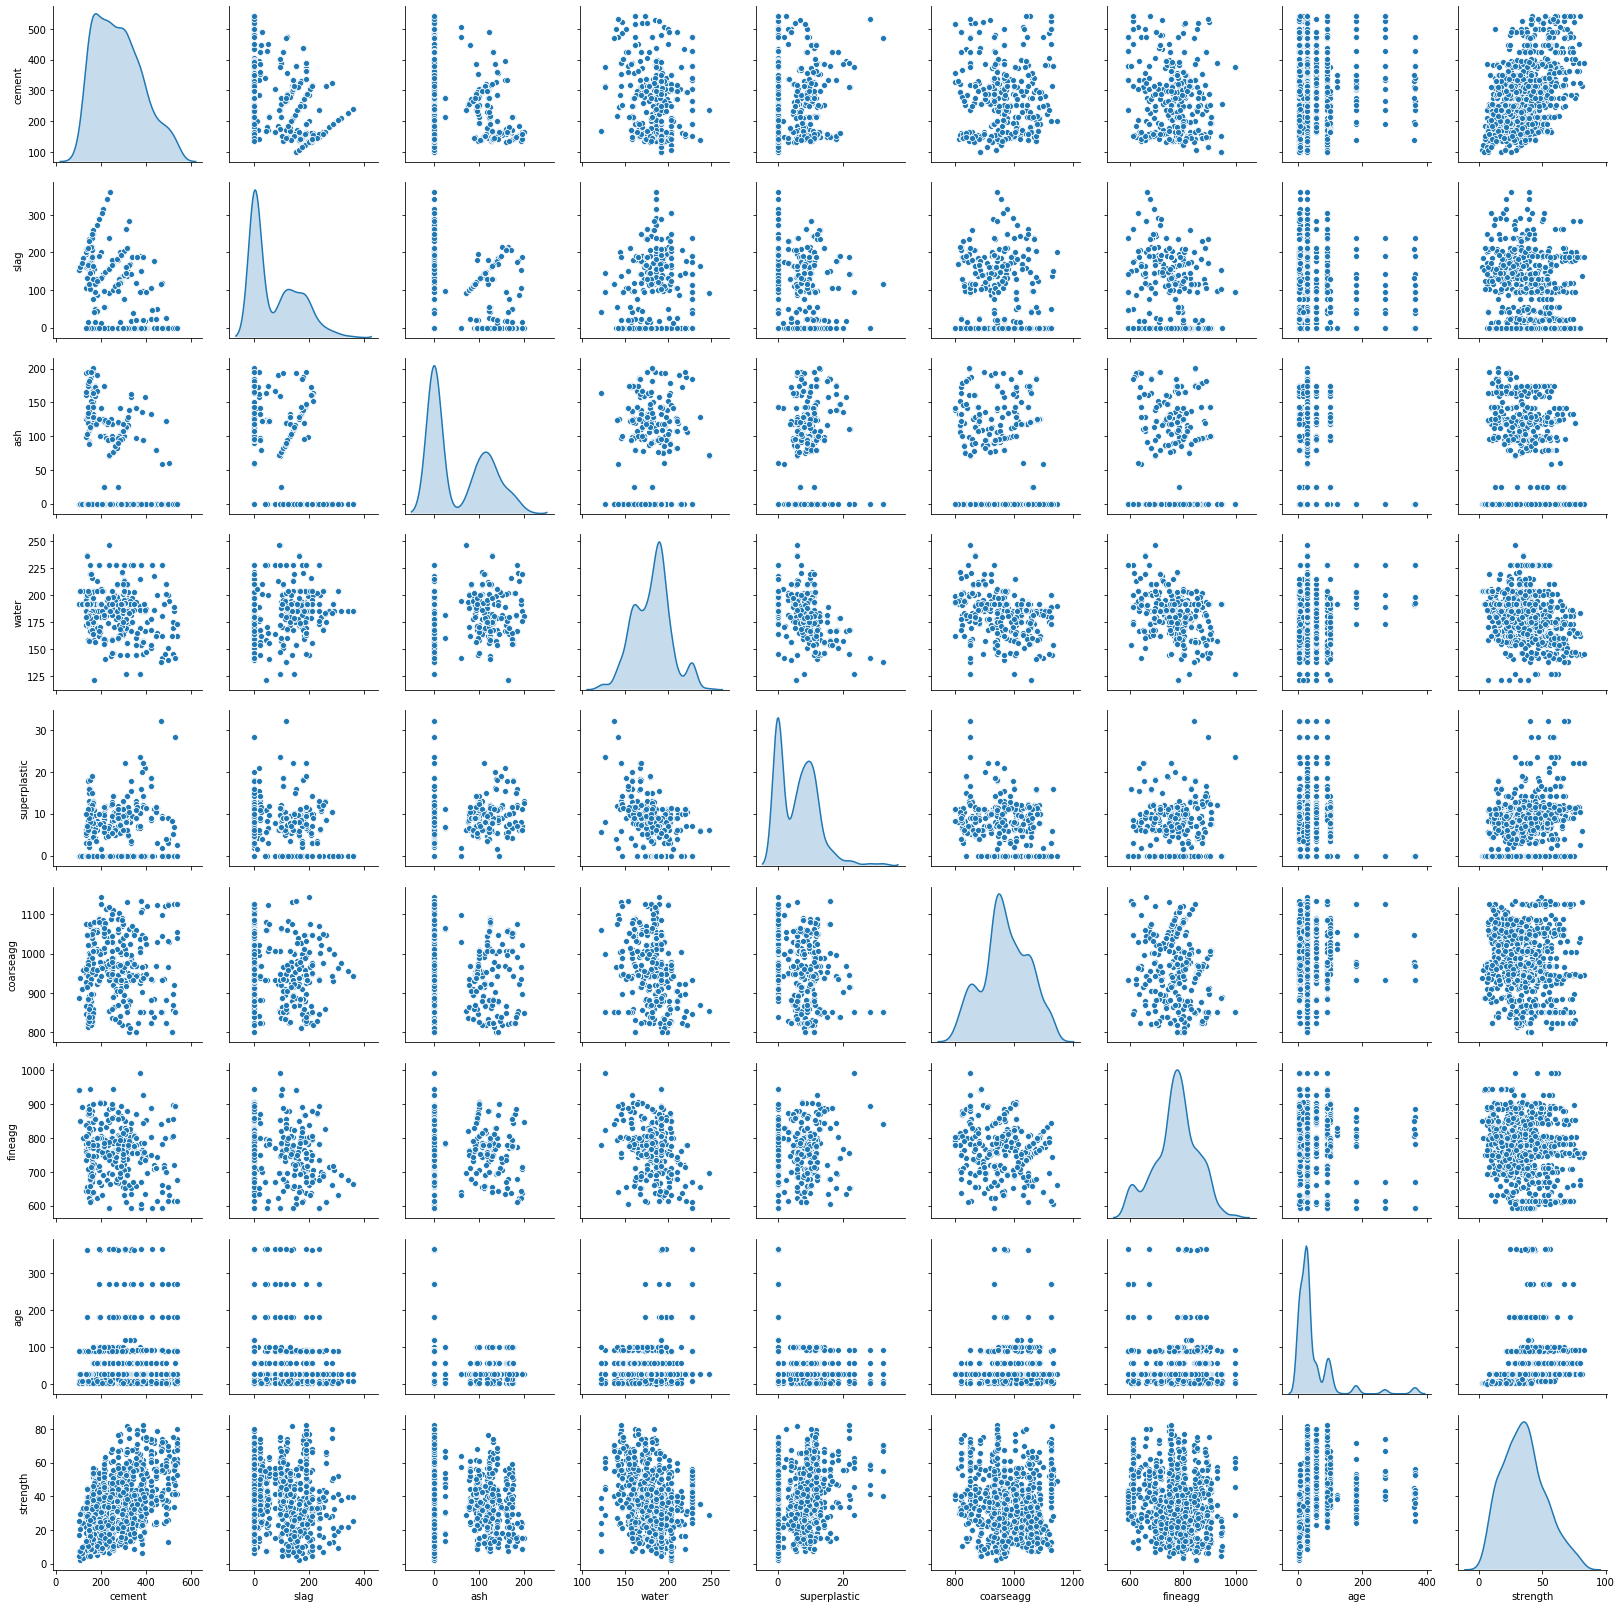

In [15]:
sns.pairplot(cm_df, diag_kind='kde')

<ul>
    <li>Not much association can be gathered by looking at the pairplots.
    </li>
    <li>There is a seemingly linear relationship b/w cement and strength.
    </li>
    <li>Strength itself follows a near normal distribution.
    </li>
</ul>

<br>
<br>

## Checking for outliers having a standard deviation of more than 3

In [14]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(cm_df))
print(z)

[[1.33901711 1.60144087 0.84714393 ... 0.31296991 0.27973311 0.35501811]
 [1.07479007 0.36754132 1.09607803 ... 0.28226038 0.50146528 0.73710825]
 [0.29838379 0.85688789 0.64896501 ... 1.09337085 0.27973311 0.39514356]
 ...
 [0.04564488 0.4882354  0.56454507 ... 0.06589318 0.27973311 0.50678082]
 [0.58237302 0.41624406 0.84714393 ... 1.29254178 3.55306569 1.15238141]
 [2.47791487 0.85688789 0.84714393 ... 2.00382326 0.61233136 1.005654  ]]


In [15]:
print(np.where(z>3))

(array([  21,   44,   64,   66,  133,  149,  156,  157,  159,  198,  232,
        256,  262,  263,  270,  292,  297,  313,  323,  361,  393,  448,
        465,  484,  538,  564,  570,  601,  623,  632,  713,  720,  744,
        754,  755,  816,  838,  850,  878,  901,  918,  919,  951,  955,
        957,  990,  995, 1026, 1028], dtype=int64), array([1, 4, 7, 3, 7, 7, 4, 7, 7, 7, 4, 7, 7, 3, 7, 4, 7, 7, 7, 7, 7, 7,
       7, 7, 4, 1, 7, 7, 7, 7, 7, 7, 4, 7, 7, 4, 4, 7, 7, 7, 1, 7, 7, 4,
       7, 1, 7, 4, 7], dtype=int64))


## Capping to 3 SD for outliers in slag , water. fineagg and superplastic

In [17]:
for col in ['slag','water','fineagg','superplastic']:
    percentiles = cm_df[col].quantile([0.01,0.99]).values
    cm_df[col] = np.clip(cm_df[col], percentiles[0], percentiles[1])
    
#percentiles = cm_df['superplastic'].quantile([0.01,0.99]).values
#cm_df['superplastic'] = np.clip(cm_df['superplastic'], percentiles[0], percentiles[1])

### Did not cap for age as the data is well beyond 3 SD and after doing some domain research, ageing is an important factor when it comes to strength. Its best left untouched at the moment.

In [18]:
#percentiless = cm_df['fineagg'].quantile([0.023,0.977]).values
#percentiless

In [19]:
#cm_df['slag'] = np.clip(cm_df['slag'], percentiless[0], percentiless[1])

In [20]:
#cm_df = cm_df[(z < 3).all(axis=1)]

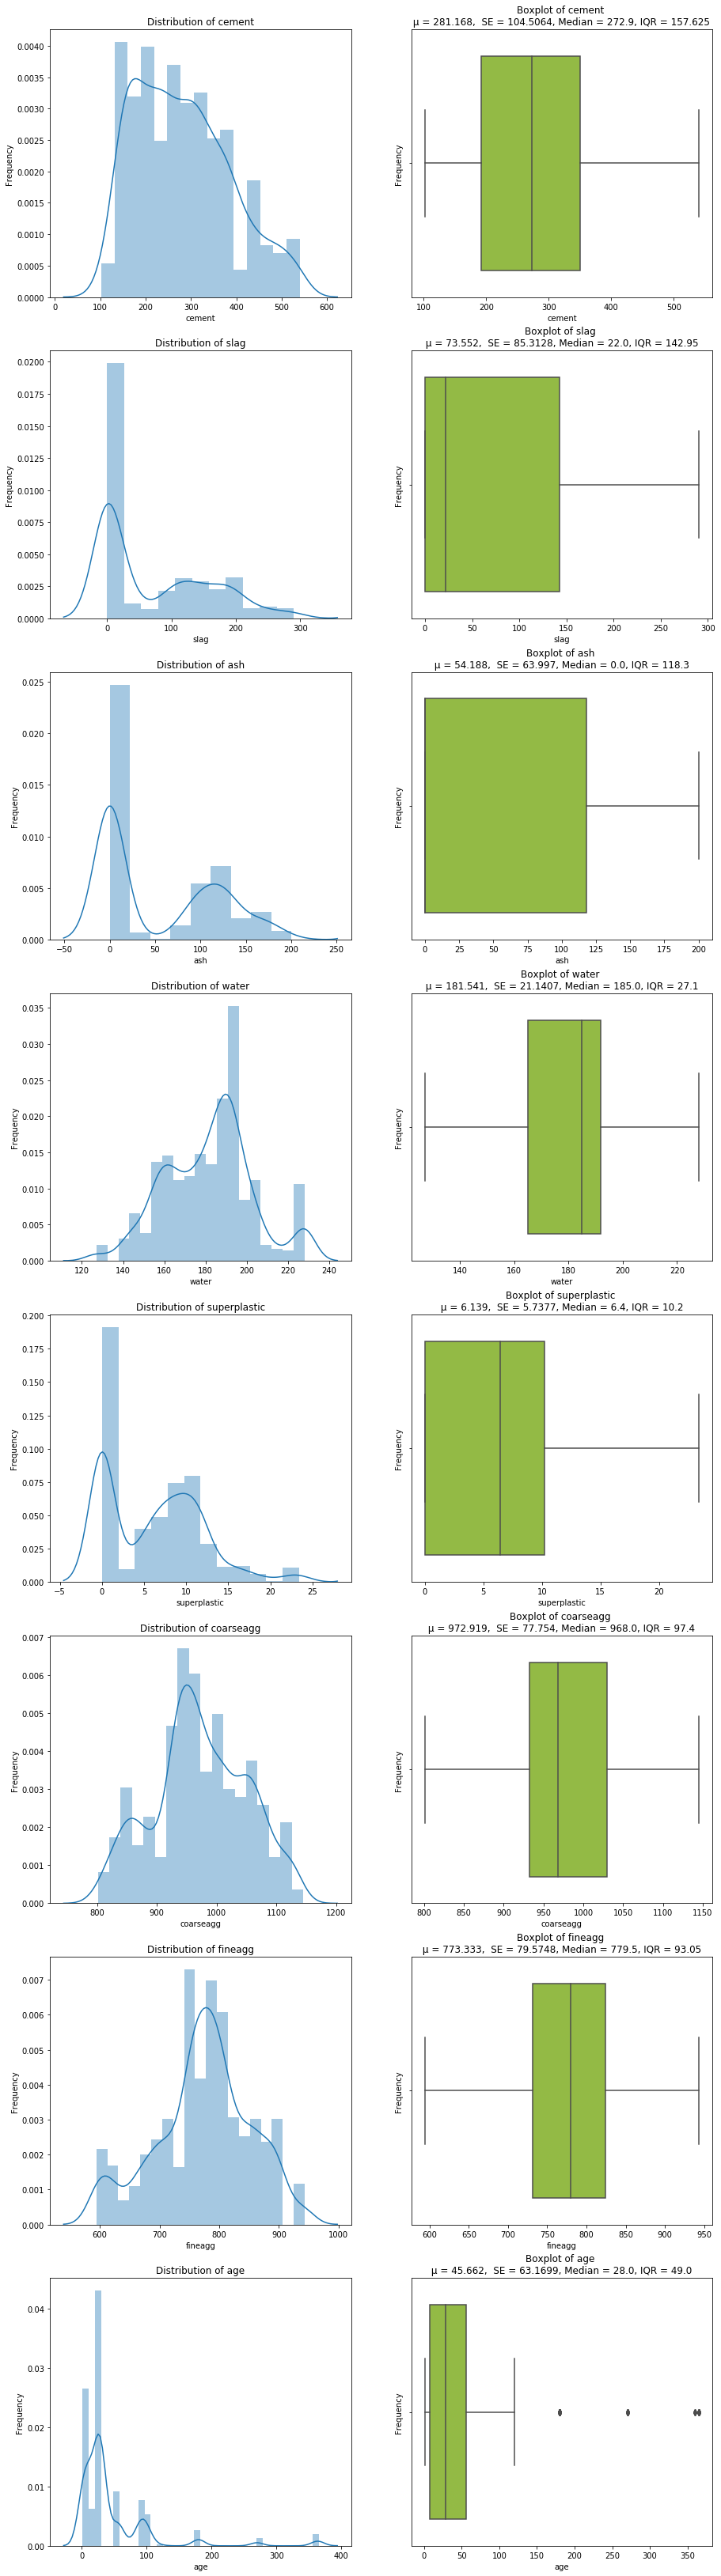

In [21]:
plt.figure(figsize = (15,66))
cols = cm_df.columns.values

i=0 # column counter 
j=1 # plot counter
k=1 # plot counter of each variable

while i < (len(cols) - 1):
    if k == 1:
        plt.subplot(9,2,j)
        sns.distplot(cm_df[cols[i]])
        j+=1
        k+=1
        plt.title(f'Distribution of {cols[i]}')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
    else:
        plt.subplot(9,2,j)
        sns.boxplot(cm_df[cols[i]], color='yellowgreen')
        j+=1
        q1, q3 = np.percentile(cm_df[cols[i]],[25,75])
        IQR = q3 - q1
        plt.title(f'Boxplot of {cols[i]} \n \u03bc = {round(cm_df[cols[i]].mean(), 3)},  SE = {round(cm_df[cols[i]].std(),4)}, Median = {round(cm_df[cols[i]].median(),3)}, IQR = {round(IQR, 3)} ')
        plt.xlabel(f'{cols[i]}')
        plt.ylabel('Frequency')
        i+=1
        k=1

Now the outliers are gone

In [23]:
cm_df.corr()

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.276196 -0.397467 -0.081787      0.073064  -0.109349   
slag         -0.276196  1.000000 -0.323827  0.106540      0.049619  -0.286267   
ash          -0.397467 -0.323827  1.000000 -0.258997      0.402790  -0.009961   
water        -0.081787  0.106540 -0.258997  1.000000     -0.668108  -0.179189   
superplastic  0.073064  0.049619  0.402790 -0.668108      1.000000  -0.259049   
coarseagg    -0.109349 -0.286267 -0.009961 -0.179189     -0.259049   1.000000   
fineagg      -0.227091 -0.282075  0.082344 -0.447581      0.212209  -0.175033   
age           0.081946 -0.043105 -0.154371  0.281015     -0.199051  -0.003016   
strength      0.497832  0.137455 -0.105755 -0.292509      0.366113  -0.164935   

               fineagg       age  strength  
cement       -0.227091  0.081946  0.497832  
slag         -0.282075 -0.043105  0.137455  
ash           0.082344 -0.154371 -0.105755  
water        -0.447581  0.281015 -0.292509  
superplastic  0.212209 -0.199051  0.366113  
coarseagg    -0.175033 -0.003016 -0.164935  
fineagg       1.000000 -0.156839 -0.171102  
age          -0.156839  1.000000  0.328873  
strength     -0.171102  0.328873  1.000000

<br>
<br>

## Composite Features

Added below new features after doing some domain research

In [24]:
cm_df['wc_ratio'] = cm_df['water'] / cm_df['cement']
cm_df['wb_ratio'] = cm_df['water'] / ( cm_df['water'] + cm_df['cement'] )

Not dropping columns at the moment

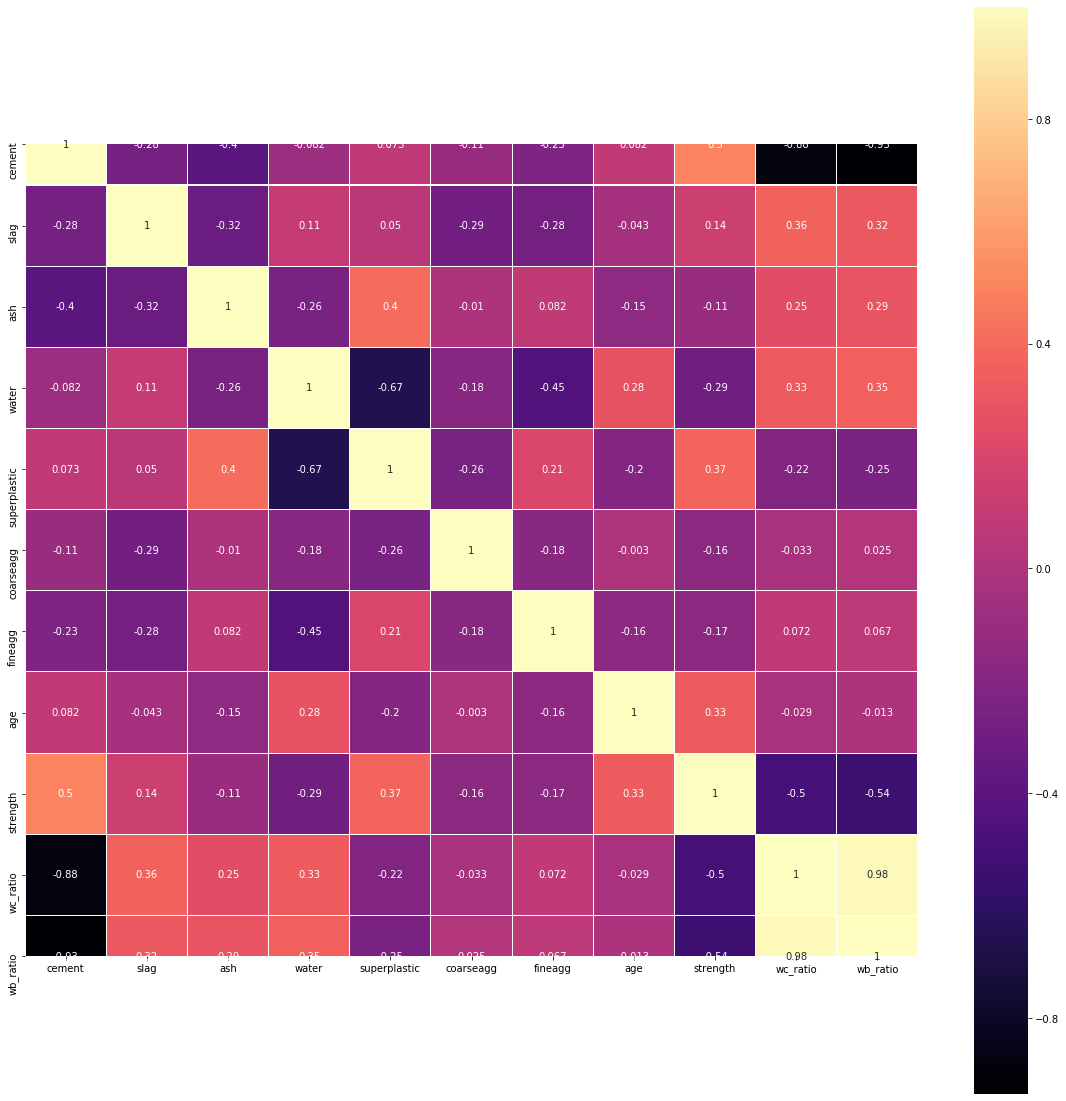

In [25]:
colormap = plt.cm.magma
plt.figure(figsize=(20,20))

sns.heatmap(cm_df.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True)

Thus we can see there is a very strong inverse correlation betweem the strength and the new features

In [26]:
cm_df.corr()

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.276196 -0.397467 -0.081787      0.073064  -0.109349   
slag         -0.276196  1.000000 -0.323827  0.106540      0.049619  -0.286267   
ash          -0.397467 -0.323827  1.000000 -0.258997      0.402790  -0.009961   
water        -0.081787  0.106540 -0.258997  1.000000     -0.668108  -0.179189   
superplastic  0.073064  0.049619  0.402790 -0.668108      1.000000  -0.259049   
coarseagg    -0.109349 -0.286267 -0.009961 -0.179189     -0.259049   1.000000   
fineagg      -0.227091 -0.282075  0.082344 -0.447581      0.212209  -0.175033   
age           0.081946 -0.043105 -0.154371  0.281015     -0.199051  -0.003016   
strength      0.497832  0.137455 -0.105755 -0.292509      0.366113  -0.164935   
wc_ratio     -0.880291  0.360059  0.246627  0.329273     -0.215673  -0.032512   
wb_ratio     -0.934950  0.319137  0.289842  0.353625     -0.250459   0.024655   

               fineagg       age  strength  wc_ratio  wb_ratio  
cement       -0.227091  0.081946  0.497832 -0.880291 -0.934950  
slag         -0.282075 -0.043105  0.137455  0.360059  0.319137  
ash           0.082344 -0.154371 -0.105755  0.246627  0.289842  
water        -0.447581  0.281015 -0.292509  0.329273  0.353625  
superplastic  0.212209 -0.199051  0.366113 -0.215673 -0.250459  
coarseagg    -0.175033 -0.003016 -0.164935 -0.032512  0.024655  
fineagg       1.000000 -0.156839 -0.171102  0.072314  0.066787  
age          -0.156839  1.000000  0.328873 -0.029111 -0.012631  
strength     -0.171102  0.328873  1.000000 -0.501573 -0.539898  
wc_ratio      0.072314 -0.029111 -0.501573  1.000000  0.978721  
wb_ratio      0.066787 -0.012631 -0.539898  0.978721  1.000000

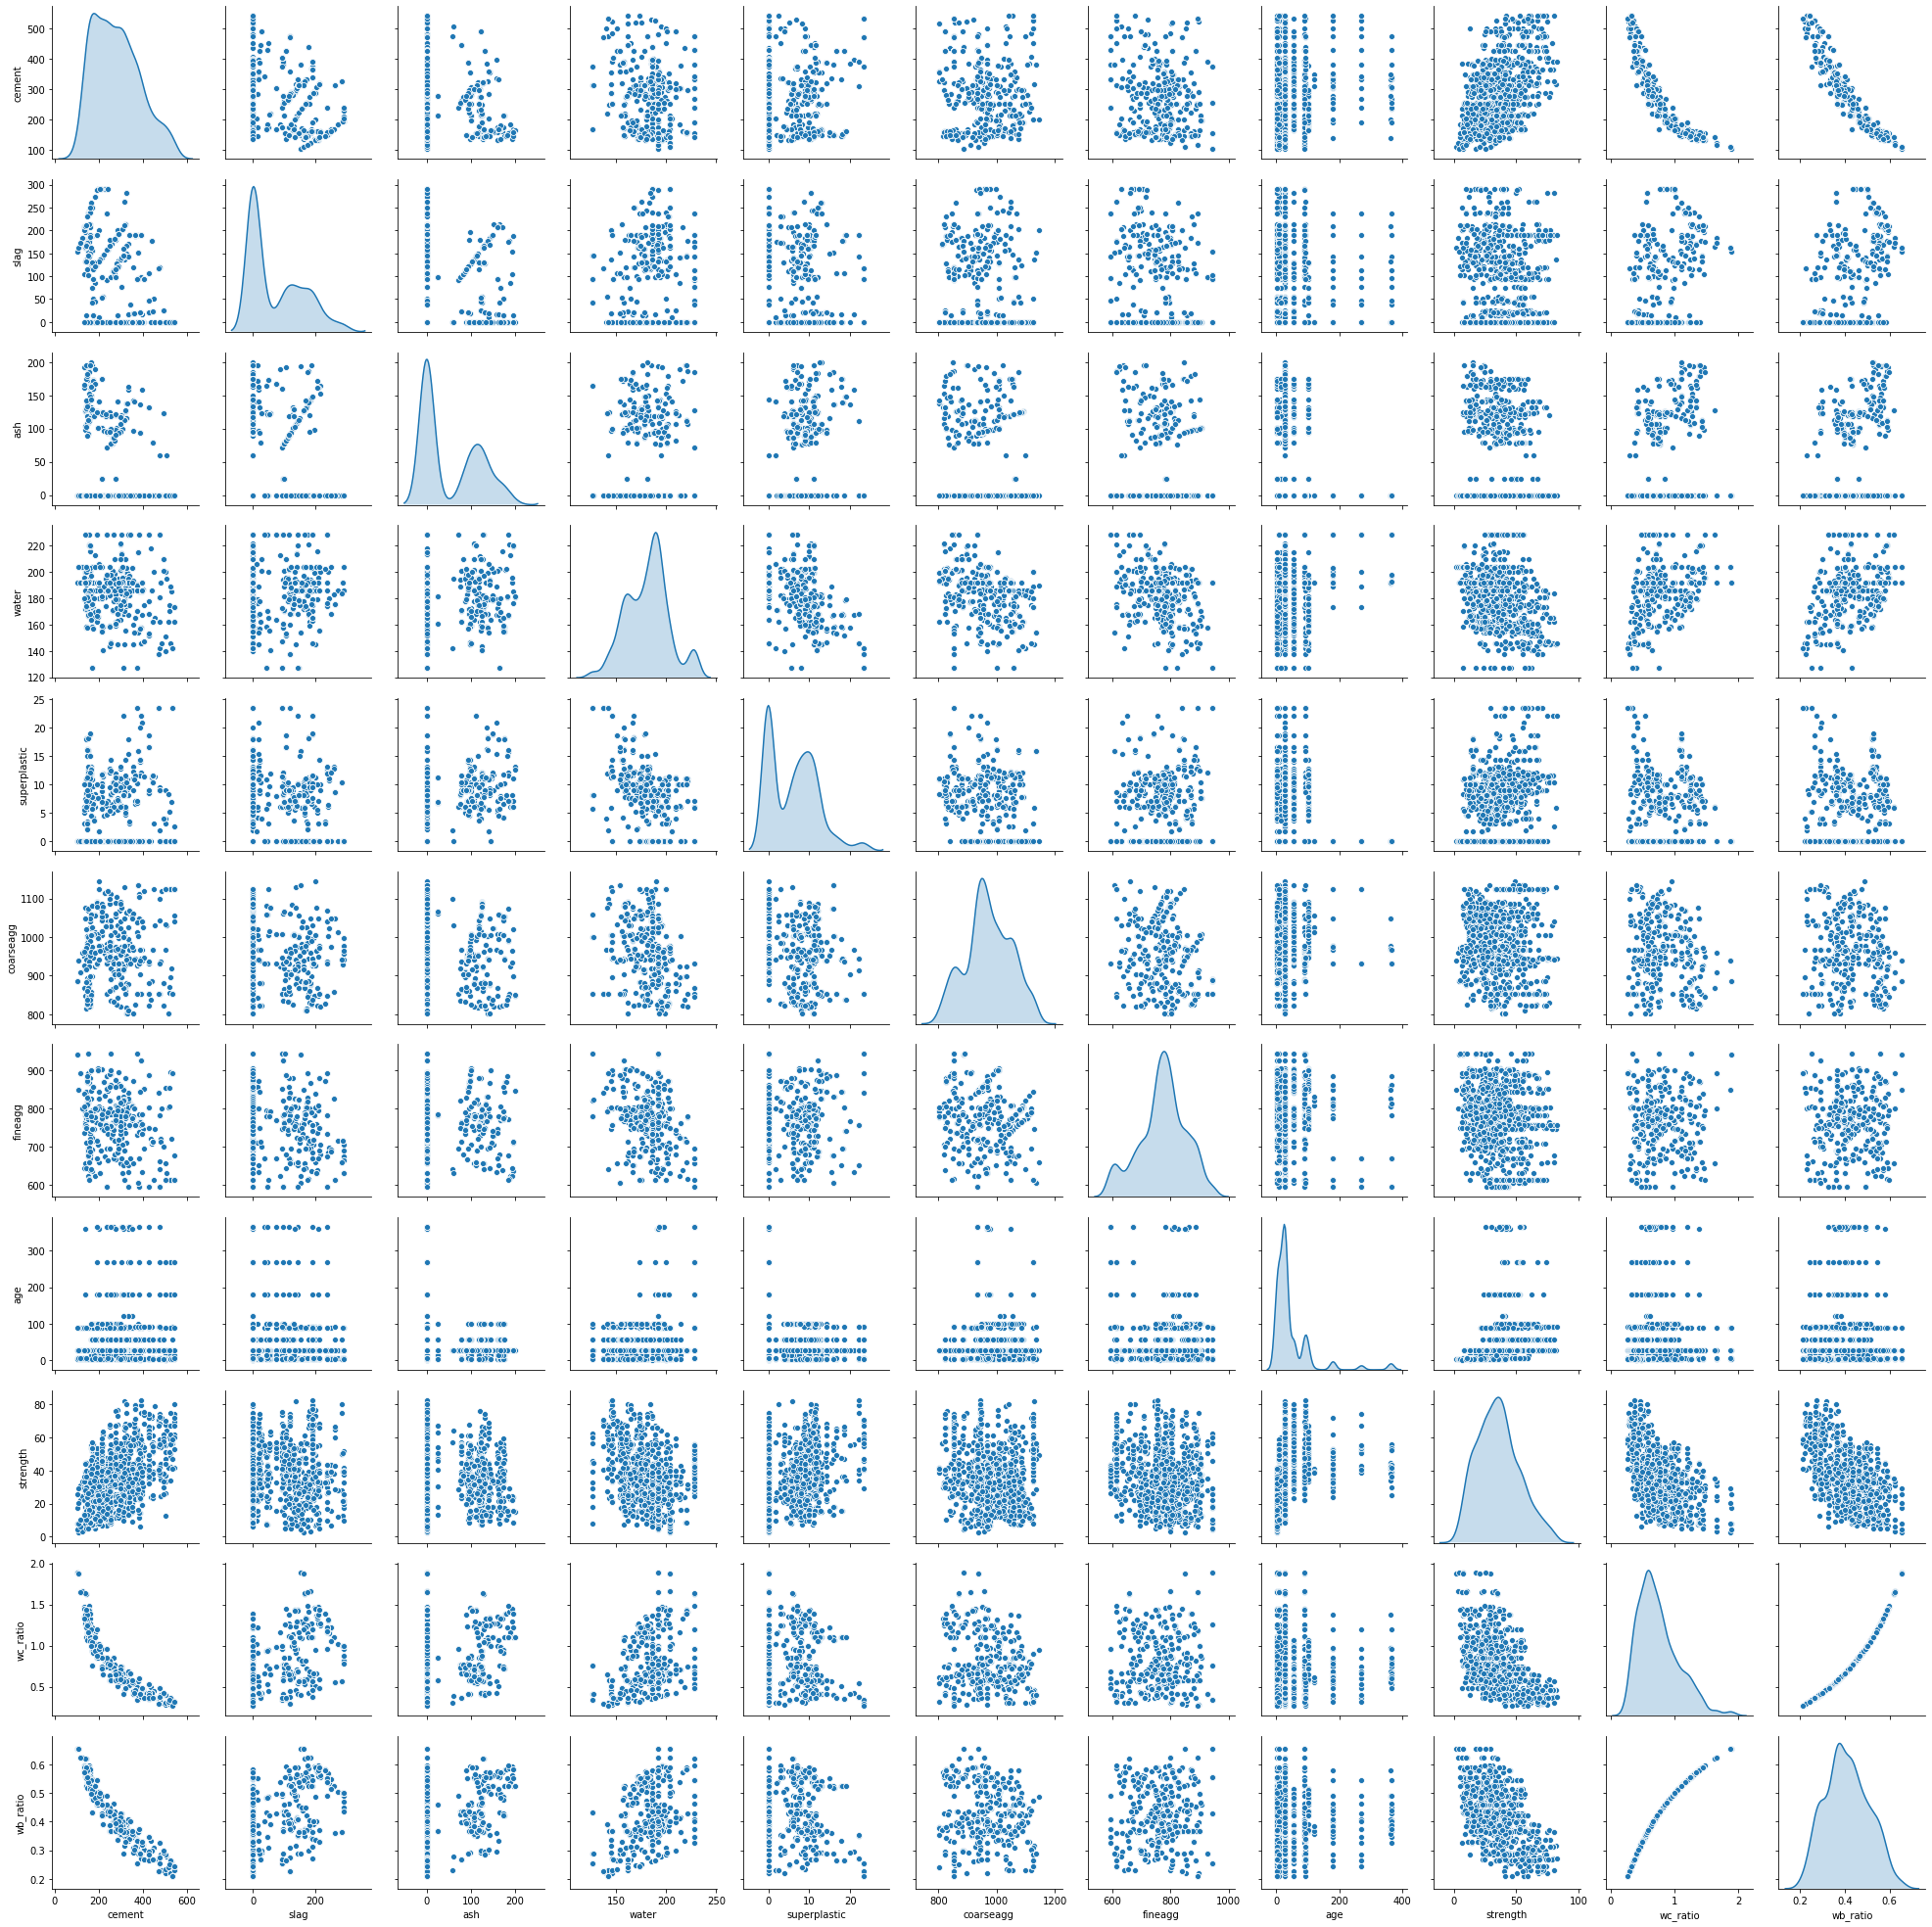

In [27]:
sns.pairplot(cm_df, diag_kind='kde')

The pairplots justify the addition of new features

<br>
<br>

## Decide on the complexity of model

## Order 1 complexity

### Linear Models

In [28]:
X = cm_df.drop(['strength'], axis = 1)
y = cm_df['strength']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.30 , random_state = 1234)

In [30]:
scale = StandardScaler() # Standard scaling
scale.fit(X_train.iloc[:,:])# fitting on training data so the data integrity in test is maintained

StandardScaler(copy=True, with_mean=True, with_std=True)

In [31]:
X_train.iloc[:,:] = scale.transform(X_train.iloc[:,:])
X_test.iloc[:,:] = scale.transform(X_test.iloc[:,:])

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [32]:
X_train

cement      slag       ash     water  superplastic  coarseagg  \
658  2.278479 -0.881952 -0.825973  0.371583     -1.049357   1.940231   
356 -1.384736  1.046448  1.155415 -0.427981      0.673485  -0.656994   
627  0.978932 -0.643878  0.652205 -1.133478      1.345394  -0.464131   
415  0.360235  1.072636 -0.825973  0.442132     -0.256849  -1.338444   
307  1.958300 -0.572456  1.108239  1.359279     -0.377448  -1.184154   
..        ...       ...       ...       ...           ...        ...   
279  1.468616  1.225003 -0.825973  0.230483      0.862998  -1.146867   
689 -0.831958 -0.881952  0.754420 -0.728993      0.242775   0.415326   
664 -1.036307  0.498877 -0.825973  0.512682     -1.049357  -0.350984   
723 -1.092809  0.015587  1.800152 -0.804246      0.311689   0.426897   
815 -0.951554 -0.343905  1.092514 -0.512641      0.363374   1.096776   

      fineagg       age  wc_ratio  wb_ratio  
658 -2.011195 -0.266101 -1.209933 -1.482620  
356 -0.112343 -0.266101  1.637405  1.527810  
627  0.906246 -0.678099 -1.066152 -1.237705  
415  0.013409 -0.266101 -0.476926 -0.380777  
307 -0.929729 -0.266101 -0.996869 -1.125285  
..        ...       ...       ...       ...  
279 -0.817810 -0.266101 -1.009484 -1.145496  
689  1.672075  0.195336  0.333918  0.514979  
664  1.054634 -0.612179  1.149961  1.195605  
723 -0.035634  0.195336  0.747771  0.882411  
815  0.097663 -0.266101  0.600256  0.757170  

[721 rows x 10 columns]

### Linear Regression

In [33]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

for idx, col in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col, reg_model.coef_[idx]))


The coefficient for cement is 5.6341173172644305
The coefficient for slag is 8.780376052692777
The coefficient for ash is 5.711588826921984
The coefficient for water is -0.8710858071124834
The coefficient for superplastic is 1.9842179457029168
The coefficient for coarseagg is 1.6279634080073284
The coefficient for fineagg is 1.5473928823046714
The coefficient for age is 7.176523957331023
The coefficient for wc_ratio is 4.261109440728485
The coefficient for wb_ratio is -11.915885834469142


In [34]:
reg_model.coef_

array([  5.63411732,   8.78037605,   5.71158883,  -0.87108581,
         1.98421795,   1.62796341,   1.54739288,   7.17652396,
         4.26110944, -11.91588583])

In [35]:
intercept = reg_model.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 35.81976421636617


### Ridge Regression

In [36]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [  6.10279243   8.72429259   5.62958604  -1.0709561    2.00912053
   1.56858618   1.50562527   7.16999823   3.56188603 -10.66251302]


### Lasso Regression

In [37]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 6.53818173  7.00141464  3.95614355 -2.92338028  2.05989693  0.13562283
 -0.          6.97081241 -0.         -4.79784305]


<br>
<br>

## Decision Tree Regression

In [38]:
dt_model = DecisionTreeRegressor( max_depth=10)

In [39]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
dt_model.score(X_test, y_test)

0.791617587346187

In [41]:
dt_model.score(X_train, y_train)

0.9818606947345222

<br>
<br>

## Comparing the scores

In [42]:
#Linear Regression
print(reg_model.score(X_train, y_train))
print(reg_model.score(X_test, y_test))

0.6469072965023624
0.5693919307295272


In [43]:
# Ridge Regression
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.6468870351477615
0.5693373180199565


In [44]:
# Lasso Regression
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.6443160333276005
0.5661724346168292


In [45]:
rfTree = RandomForestRegressor(n_estimators=50)
rfTree.fit(X_train,y_train)
print("rfTree on train data ", rfTree.score(X_train,y_train))
print("rfTree on test data ", rfTree.score(X_test, y_test))

rfTree on train data  0.9887542518935672
rfTree on test data  0.876199983678959


<br>
<br>

## Time to use Quadratic model to resolve non-linear interaction

In [46]:
#X_train = X_train.drop(['coarseagg','wc_ratio'], axis = 1 , inplace= True)
#X_test = X_test.drop(['coarseagg','wc_ratio'], axis = 1 , inplace= True)

In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, interaction_only=True)

In [48]:
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

In [49]:
X_train.shape

(721, 56)

In [50]:
X_test.shape

(309, 56)

In [51]:
#X_train, X_test, y_train, y_test = train_test_split(X_poly , y ,test_size = 0.30 , random_state = 1)

In [52]:
X_train

array([[ 1.        ,  2.27847859, -0.88195206, ...,  0.32196465,
         0.39452705,  1.79387161],
       [ 1.        , -1.38473574,  1.04644769, ..., -0.43571536,
        -0.40655207,  2.50164359],
       [ 1.        ,  0.97893212, -0.64387802, ...,  0.72295596,
         0.83928593,  1.31958115],
       ...,
       [ 1.        , -1.03630662,  0.49887739, ..., -0.70398171,
        -0.73192408,  1.37489822],
       [ 1.        , -1.09280864,  0.01558708, ...,  0.14606654,
         0.17236659,  0.65984154],
       [ 1.        , -0.95155359, -0.34390472, ..., -0.1597288 ,
        -0.2014838 ,  0.45449569]])

In [53]:
X_train

array([[ 1.        ,  2.27847859, -0.88195206, ...,  0.32196465,
         0.39452705,  1.79387161],
       [ 1.        , -1.38473574,  1.04644769, ..., -0.43571536,
        -0.40655207,  2.50164359],
       [ 1.        ,  0.97893212, -0.64387802, ...,  0.72295596,
         0.83928593,  1.31958115],
       ...,
       [ 1.        , -1.03630662,  0.49887739, ..., -0.70398171,
        -0.73192408,  1.37489822],
       [ 1.        , -1.09280864,  0.01558708, ...,  0.14606654,
         0.17236659,  0.65984154],
       [ 1.        , -0.95155359, -0.34390472, ..., -0.1597288 ,
        -0.2014838 ,  0.45449569]])

### Linear Regression

In [54]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Ridge Regression

In [55]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 0.00000000e+00  4.86407178e+00  8.84438554e+00  5.50734299e+00
 -1.33216121e+00  2.77529962e+00 -8.13692877e-01  2.49274301e-01
  1.36380410e+01 -4.11742607e+00 -4.07069862e+00  3.58383215e+00
 -6.99155989e-01 -1.16421409e+01 -3.61324007e+00  2.75413940e+00
 -7.20090611e-01 -2.41233066e+00 -1.26091667e+00 -2.68403739e+00
  2.25025985e+00 -5.44196772e+00 -3.50147383e+00 -1.68879332e-01
  2.36007432e+00  4.60201963e+00 -2.09185688e+00  3.94409013e+00
 -3.62556704e+00 -4.49906139e+00 -8.88500088e-04  2.41825375e+00
  7.30699639e+00  2.48412389e+00 -5.11367055e+00 -1.66378005e+00
 -3.38592697e+00 -2.80982978e+00  9.90960640e-01  1.56345976e+00
 -7.71857383e+00 -8.45892895e-01 -3.27142952e+00  8.52223734e-01
 -1.59329779e+01  1.51373078e+01  7.16639525e-01  1.49193536e-01
 -7.57045251e+00  9.24544480e+00  2.65401056e+00 -1.45142884e+00
 -1.27946156e+00  7.27966689e+00 -1.43834453e+01 -2.57484280e+00]


### Lasso Regression

In [56]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.          4.25461628  7.53528911  3.95422699 -0.76158595  4.21237467
 -0.14363106 -0.         12.98374653 -1.45873775 -6.08710818 -0.
 -0.         -2.73569552 -1.79927493  0.          0.          0.
 -0.         -0.03657554  1.0332708  -0.          0.29933181 -0.04600091
  2.26212816  1.21653717  0.          0.         -1.10823809 -1.03477316
  0.09561806  1.61638254  2.78656061 -0.37544603 -0.          1.63591822
 -0.1692384  -0.50896931 -1.94262515 -0.          0.          1.35246674
 -0.          3.01700855 -1.09369201  0.          0.56073743 -0.28053589
  0.01724896  0.          0.         -0.         -0.         -0.
 -0.         -0.        ]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.334133747935994, tolerance: 20.55749652599168
  positive)


<br>
<br>

## Comparing the scores

In [57]:
#Linear Regression
print(reg_model.score(X_train, y_train))
print(reg_model.score(X_test, y_test))

0.7862700966396026
0.7020362275887368


In [58]:
# Ridge Regression
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.786799885318611
0.7129421087004818


In [59]:
# Lasso Regression
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7662950423534712
0.7168554958388105


In [60]:
rfTree = RandomForestRegressor(n_estimators=50)
rfTree.fit(X_train,y_train)
print("rfTree on train data ", rfTree.score(X_train,y_train))
print("rfTree on test data ", rfTree.score(X_test, y_test))

rfTree on train data  0.9875069234910384
rfTree on test data  0.8688966939157818


<br>
<br>

## Decision Tree Regression

In [61]:
dt_model = DecisionTreeRegressor( max_depth=5)

In [62]:
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [63]:
dt_model.score(X_test, y_test)

0.7516005752919707

In [64]:
dt_model.score(X_train, y_train)

0.8633678728109131

In [65]:
X_train.shape

(721, 56)

### Although Linear , Lasso & Ridge gave better results in order 2 complexity models, but order 1 is enough to capture the data. After fine tuning the models , we will resolve the overfit issue

<br>
<br>
<br>
<br>


## Exploring K-Means Clusters based on mix of Gaussians

In [66]:
cm_df_z = cm_df.apply(zscore) # standardised score

In [223]:

# cluster analysis using Kmeans
cluster_range = range( 2, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(cm_df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )


In [224]:
clusters_df # checking errors for various clusters created

num_clusters  cluster_errors
0              2     8844.583630
1              3     7407.696209
2              4     6254.043929
3              5     5539.805511
4              6     5149.636052
5              7     4799.982253
6              8     4458.046025
7              9     4136.787486
8             10     3884.845420
9             11     3693.858565
10            12     3545.683089
11            13     3392.737251
12            14     3258.214231

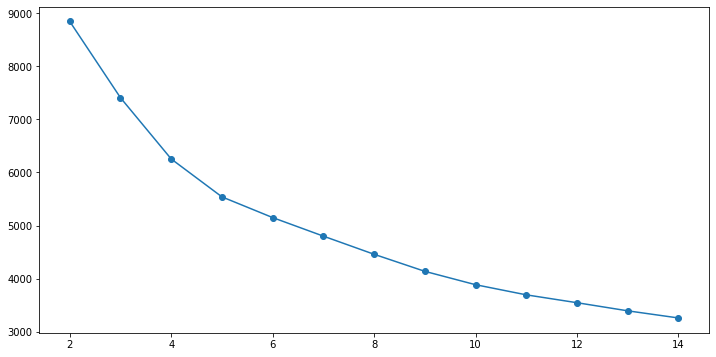

In [225]:
# Elbow plot to find optimal cluster
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

Taking clusters 5 & 4 seems reasonable

## Taking 5 clusters

In [227]:
kmeans = KMeans(n_clusters= 5)
kmeans.fit(cm_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [228]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[195 235 228 327  45]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259C9280588>,
      dtype=object)

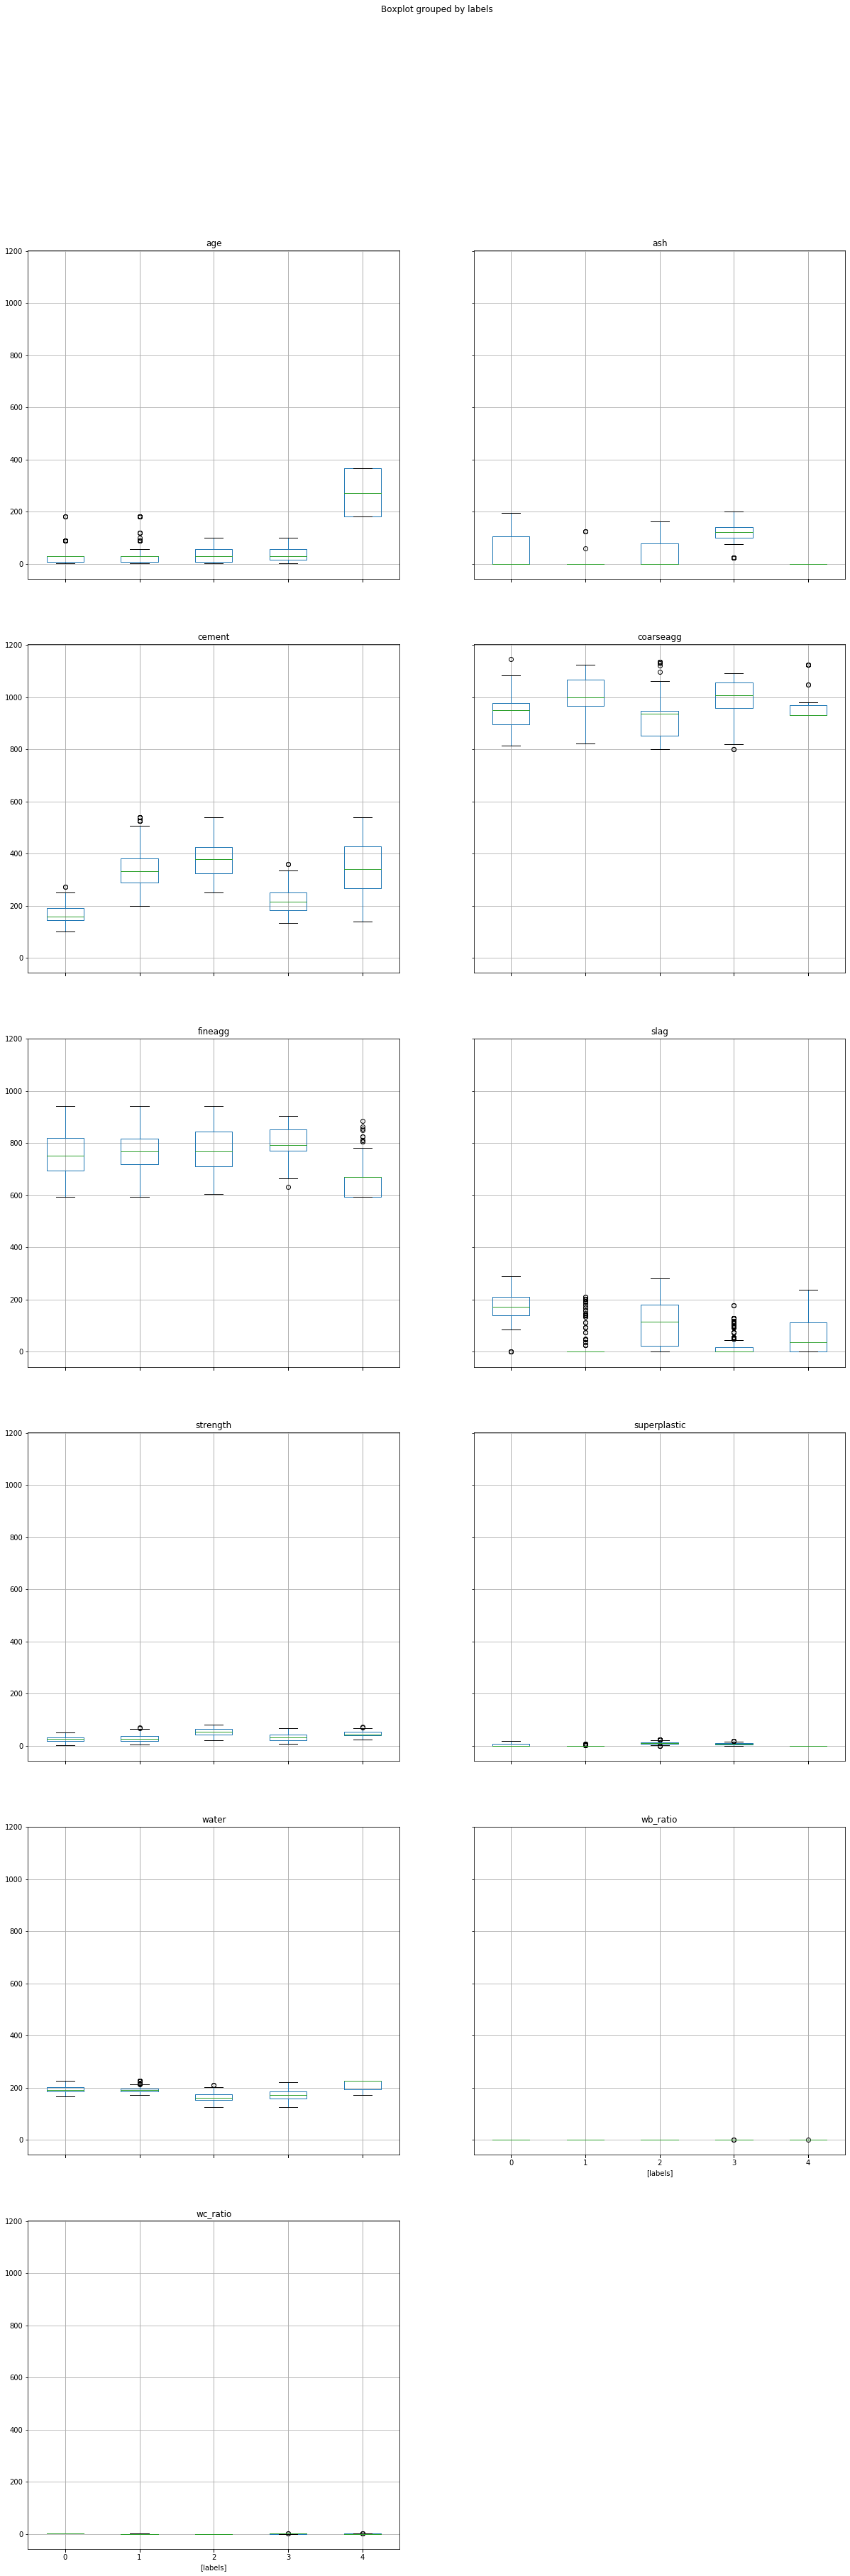

In [234]:
## creating a new dataframe only for labels and converting it into categorical variable
cluster_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
cm_df_labeled = cm_df.join(cluster_labels)

cm_df_labeled.boxplot(by = 'labels',  layout=(6,2), figsize=(20, 60))

In [235]:
prediction=kmeans.predict(cm_df_z)
cm_df_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

cm_df_z_copy = cm_df_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

### Showing centroid data across various predictors for 5 cluster size

In [237]:
centroids = kmeans.cluster_centers_
centroids

array([[-1.09134967,  1.23992692, -0.20795751,  0.59880088, -0.40349589,
        -0.36661938, -0.17509195, -0.23156931, -0.5975245 ,  1.47377741,
         1.35886373],
       [ 0.59988632, -0.58768355, -0.8186048 ,  0.59647   , -1.012888  ,
         0.45907628, -0.17541653, -0.146896  , -0.40888229, -0.50066612,
        -0.45083946],
       [ 0.99151597,  0.43257658, -0.33666796, -0.85131499,  1.00835385,
        -0.64609892,  0.06176808, -0.2123521 ,  1.08643025, -0.98236603,
        -1.12792028],
       [-0.56040924, -0.60660861,  1.06362574, -0.40905138,  0.41276264,
         0.34482513,  0.36125989, -0.13549581, -0.19881107,  0.19633913,
         0.32461859],
       [ 0.64506844, -0.08770132, -0.84714393,  1.57606664, -1.0703929 ,
        -0.04087577, -1.26331759,  3.83111078,  0.66466084, -0.22118879,
        -0.17812468]])

In [238]:
centroid_df = pd.DataFrame(centroids, columns = list(cm_df) )
centroid_df

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -1.091350  1.239927 -0.207958  0.598801     -0.403496  -0.366619 -0.175092   
1  0.599886 -0.587684 -0.818605  0.596470     -1.012888   0.459076 -0.175417   
2  0.991516  0.432577 -0.336668 -0.851315      1.008354  -0.646099  0.061768   
3 -0.560409 -0.606609  1.063626 -0.409051      0.412763   0.344825  0.361260   
4  0.645068 -0.087701 -0.847144  1.576067     -1.070393  -0.040876 -1.263318   

        age  strength  wc_ratio  wb_ratio  
0 -0.231569 -0.597524  1.473777  1.358864  
1 -0.146896 -0.408882 -0.500666 -0.450839  
2 -0.212352  1.086430 -0.982366 -1.127920  
3 -0.135496 -0.198811  0.196339  0.324619  
4  3.831111  0.664661 -0.221189 -0.178125

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259CAF00CC8>,
      dtype=object)

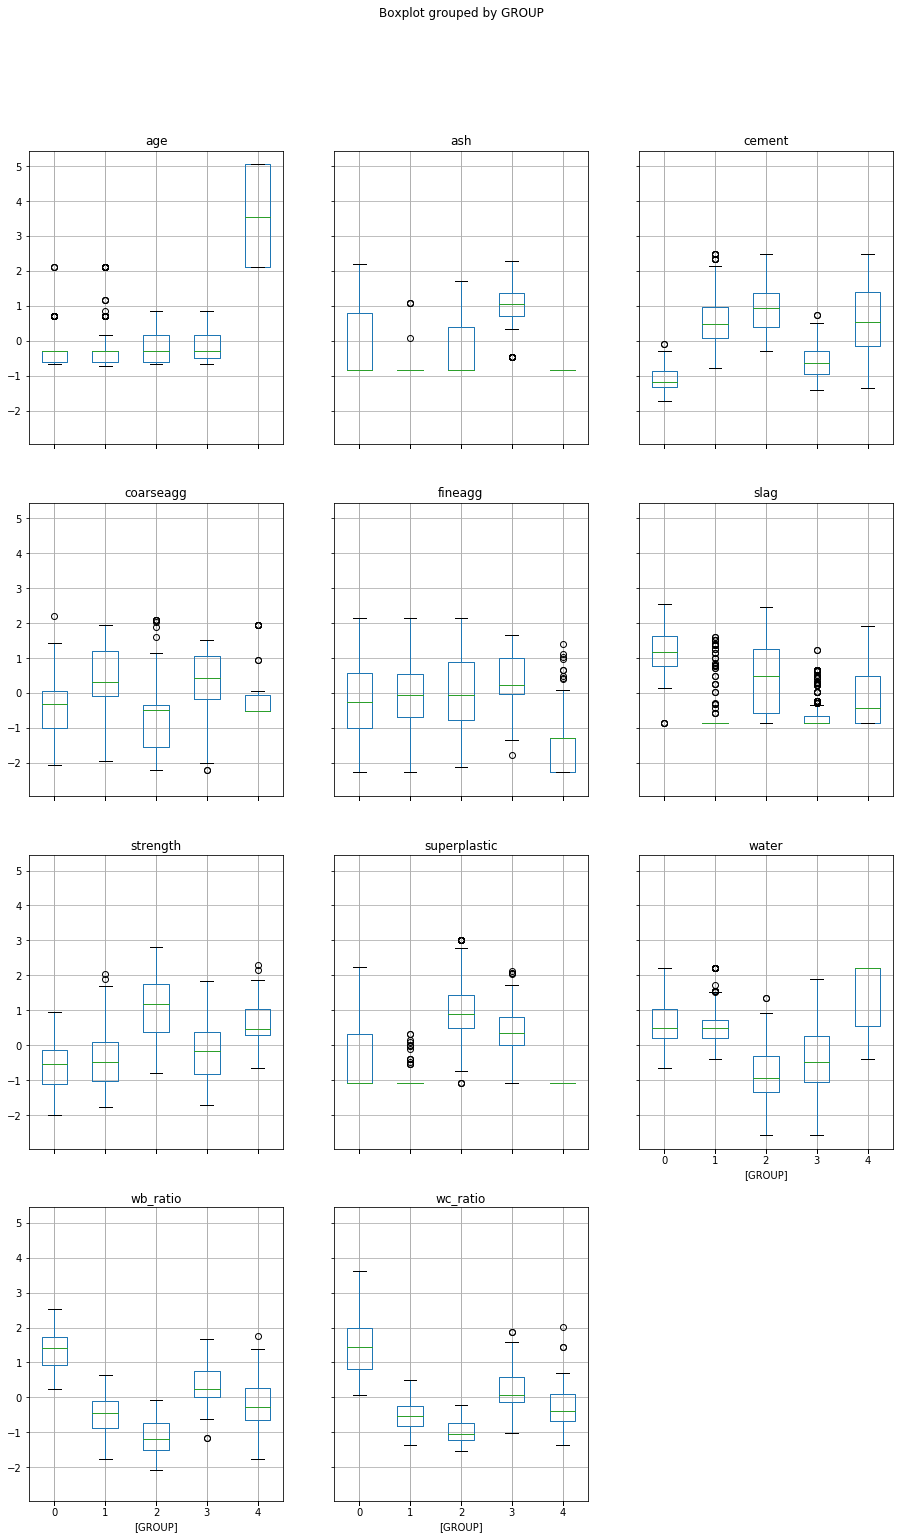

In [245]:
cm_df_z.boxplot(by = 'GROUP', layout=(4,3), figsize=(15, 25))

### Doing visual analysis on clusters for each predictor

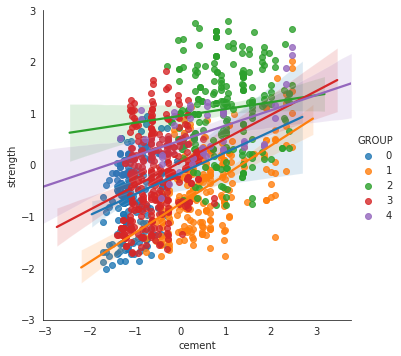

In [242]:
var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z,hue='GROUP')
plot.set(ylim = (-3,3))

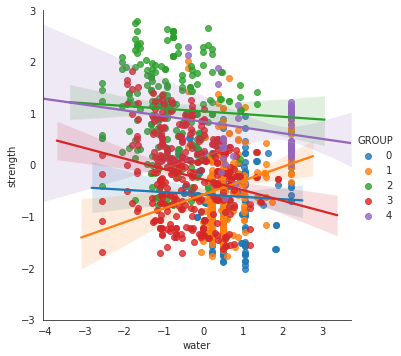

In [246]:
var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z,hue='GROUP')
plot.set(ylim = (-3,3))

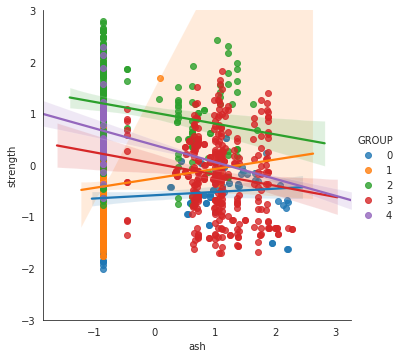

In [247]:
var = 'ash'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z,hue='GROUP')
plot.set(ylim = (-3,3))

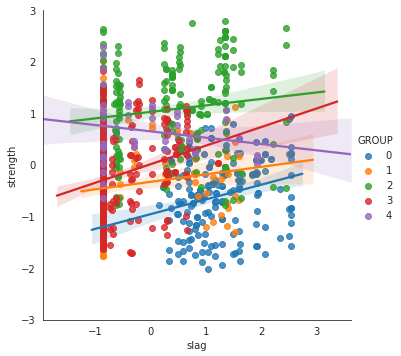

In [248]:
var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z,hue='GROUP')
plot.set(ylim = (-3,3))

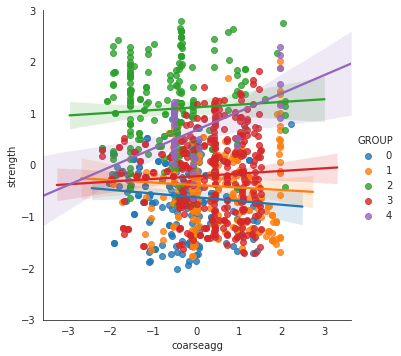

In [249]:
var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z,hue='GROUP')
plot.set(ylim = (-3,3))

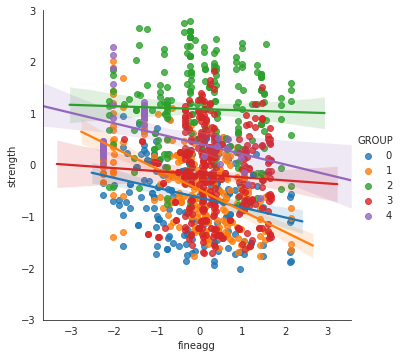

In [250]:
var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z,hue='GROUP')
plot.set(ylim = (-3,3))

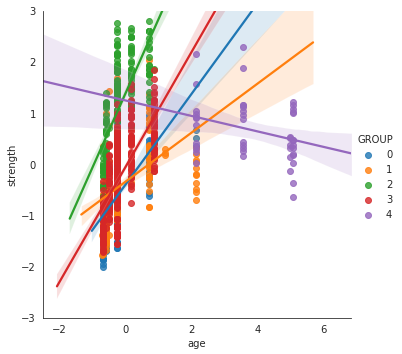

In [251]:
var = 'age'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z,hue='GROUP')
plot.set(ylim = (-3,3))

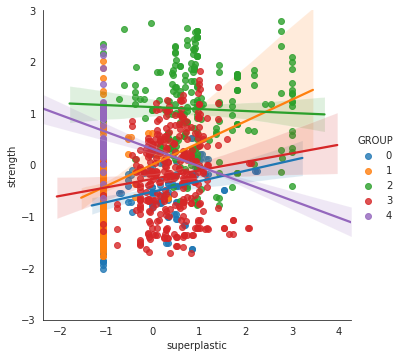

In [252]:
var = 'superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z,hue='GROUP')
plot.set(ylim = (-3,3))

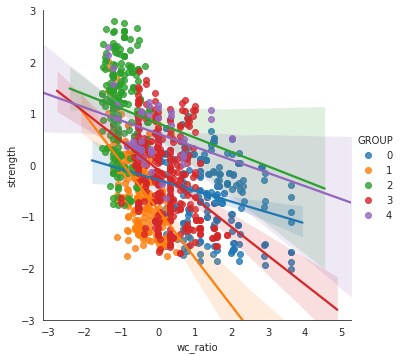

In [253]:
var = 'wc_ratio'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z,hue='GROUP')
plot.set(ylim = (-3,3))

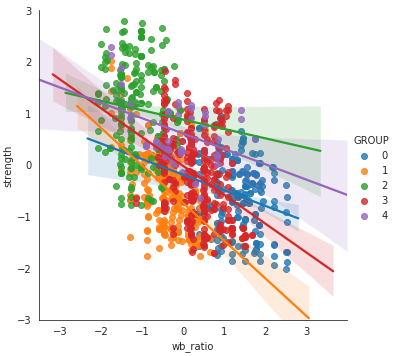

In [254]:
var = 'wb_ratio'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z,hue='GROUP')
plot.set(ylim = (-3,3))

## Repeating same steps by taking 4 clusters

In [255]:
cm_df_z2 = cm_df.apply(zscore)
kmeans = KMeans(n_clusters= 4, random_state= 1)
kmeans.fit(cm_df_z2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [256]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[329 226 201 274]


In [257]:
prediction=kmeans.predict(cm_df_z2)
cm_df_z2["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

cm_df_z2_copy = cm_df_z2.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

In [258]:
centroids = kmeans.cluster_centers_
centroids

array([[-0.56172624, -0.60816455,  1.05201012, -0.4070082 ,  0.40374649,
         0.35462484,  0.36454138, -0.13738357, -0.20698553,  0.19809147,
         0.32660124],
       [ 0.98251332,  0.44133966, -0.34916728, -0.87076737,  1.02073177,
        -0.64146366,  0.07058531, -0.21371804,  1.08451634, -0.9820097 ,
        -1.12764122],
       [-1.08173439,  1.25208638, -0.2270377 ,  0.63240726, -0.42340327,
        -0.35472254, -0.21213132, -0.11504931, -0.58154949,  1.46408115,
         1.35298399],
       [ 0.65762239, -0.55228463, -0.80863119,  0.74301191, -1.01610919,
         0.36349797, -0.34032116,  0.42563643, -0.21938323, -0.50189128,
        -0.4545791 ]])

In [259]:
centroid_df = pd.DataFrame(centroids, columns = list(cm_df) )
centroid_df

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -0.561726 -0.608165  1.052010 -0.407008      0.403746   0.354625  0.364541   
1  0.982513  0.441340 -0.349167 -0.870767      1.020732  -0.641464  0.070585   
2 -1.081734  1.252086 -0.227038  0.632407     -0.423403  -0.354723 -0.212131   
3  0.657622 -0.552285 -0.808631  0.743012     -1.016109   0.363498 -0.340321   

        age  strength  wc_ratio  wb_ratio  
0 -0.137384 -0.206986  0.198091  0.326601  
1 -0.213718  1.084516 -0.982010 -1.127641  
2 -0.115049 -0.581549  1.464081  1.352984  
3  0.425636 -0.219383 -0.501891 -0.454579

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000259D157AE48>,
      dtype=object)

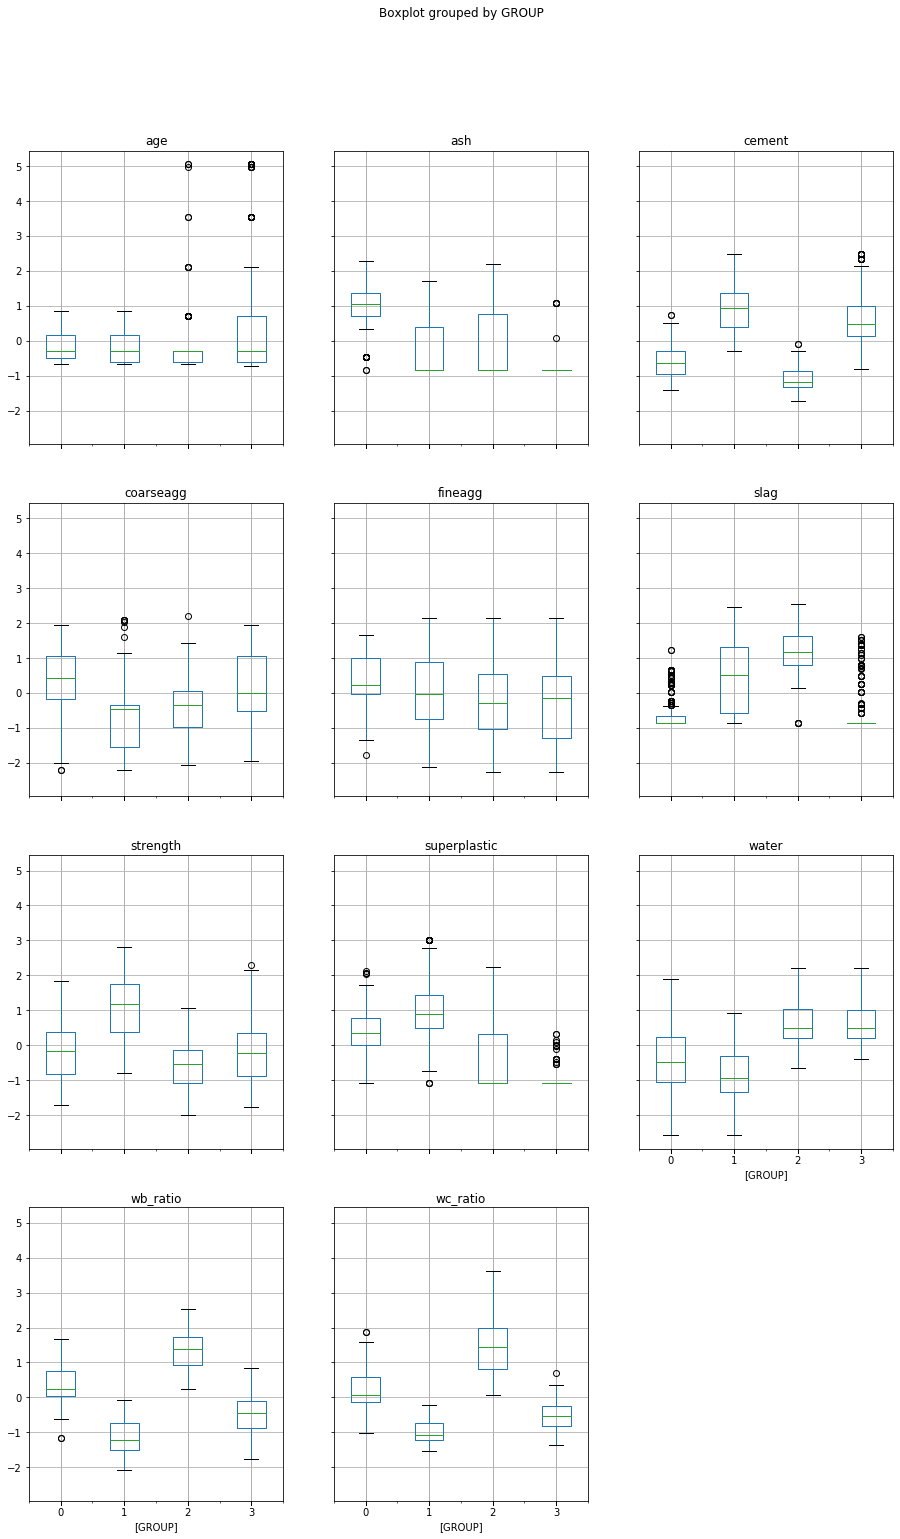

In [260]:
cm_df_z2.boxplot(by = 'GROUP', layout=(4,3), figsize=(15, 25))

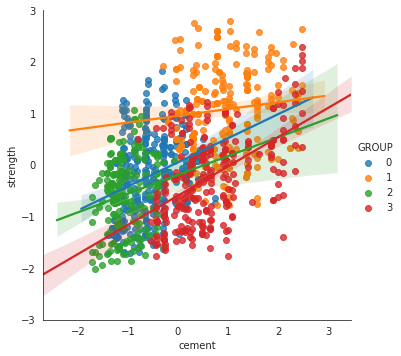

In [261]:
var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z2,hue='GROUP')
plot.set(ylim = (-3,3))

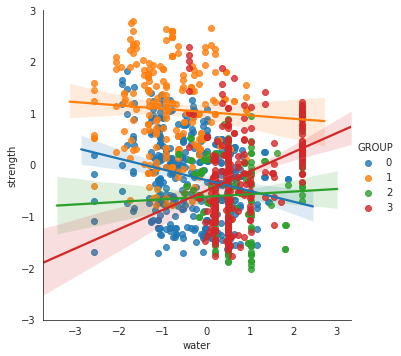

In [262]:
var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z2,hue='GROUP')
plot.set(ylim = (-3,3))

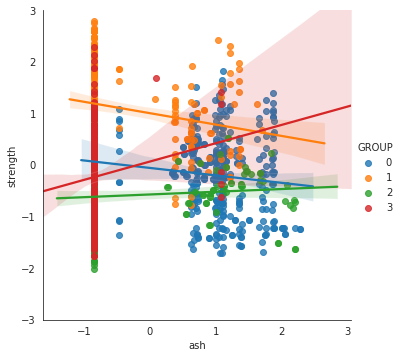

In [263]:
var = 'ash'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z2,hue='GROUP')
plot.set(ylim = (-3,3))

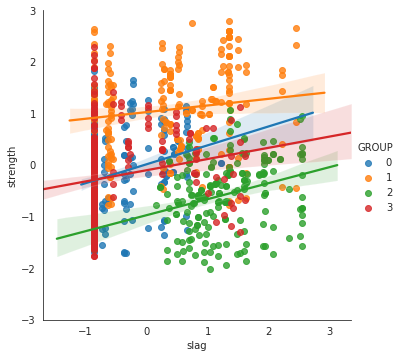

In [264]:
var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z2,hue='GROUP')
plot.set(ylim = (-3,3))

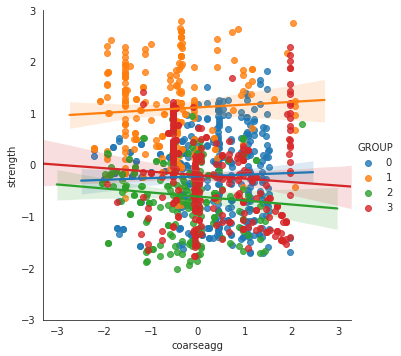

In [265]:
var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z2,hue='GROUP')
plot.set(ylim = (-3,3))

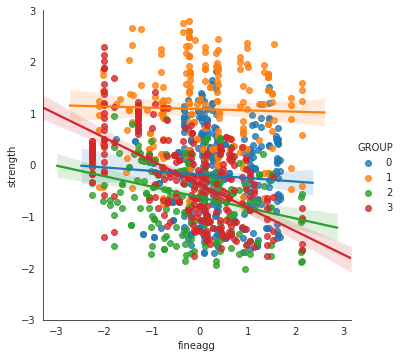

In [266]:
var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z2,hue='GROUP')
plot.set(ylim = (-3,3))

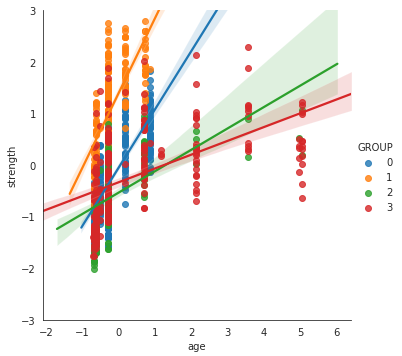

In [267]:
var = 'age'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z2,hue='GROUP')
plot.set(ylim = (-3,3))

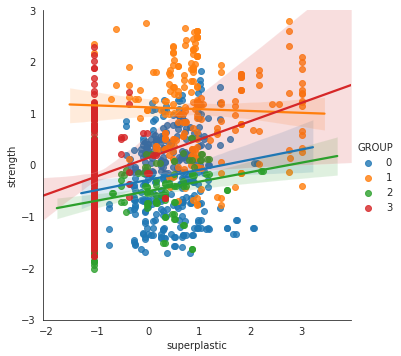

In [268]:
var = 'superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z2,hue='GROUP')
plot.set(ylim = (-3,3))

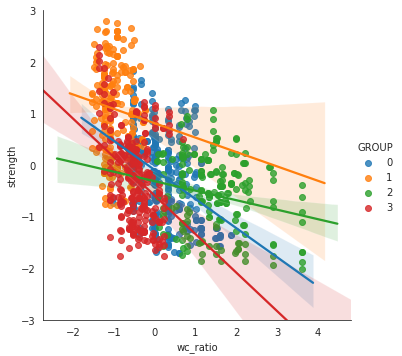

In [269]:
var = 'wc_ratio'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z2,hue='GROUP')
plot.set(ylim = (-3,3))

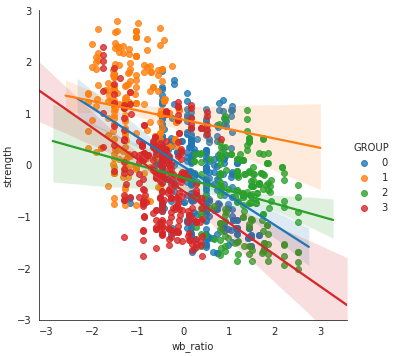

In [270]:
var = 'wb_ratio'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=cm_df_z2,hue='GROUP')
plot.set(ylim = (-3,3))

## We can say that age, wc_ratio and wb_ratio are having linear relationship with strength , other than that Kmeans doesn't help much

## Lets do some PCA

In [67]:
X = cm_df.drop(['strength'], axis = 1)
y = cm_df['strength']

In [68]:
scale2 = StandardScaler() # Standard scaling
scale2.fit(X.loc[:,:])# fitting on training data so the data integrity in test is maintained

X_scaled = scale2.transform(X.loc[:,:])

In [69]:
#should give an 18*18 matrix
covMatrix = np.cov(X_scaled,rowvar=False)
print(covMatrix)

[[ 1.00097182 -0.27646443 -0.39785361 -0.08186691  0.07313521 -0.10945526
  -0.2273117   0.08202566 -0.88114648 -0.93585814]
 [-0.27646443  1.00097182 -0.32414217  0.10664354  0.04966695 -0.28654565
  -0.28234922 -0.04314733  0.36040875  0.3194472 ]
 [-0.39785361 -0.32414217  1.00097182 -0.25924864  0.40318139 -0.00997051
   0.08242408 -0.15452054  0.24686669  0.2901239 ]
 [-0.08186691  0.10664354 -0.25924864  1.00097182 -0.66875758 -0.17936283
  -0.44801565  0.28128783  0.32959288  0.35396885]
 [ 0.07313521  0.04966695  0.40318139 -0.66875758  1.00097182 -0.25930063
   0.2124157  -0.19924397 -0.21588229 -0.25070229]
 [-0.10945526 -0.28654565 -0.00997051 -0.17936283 -0.25930063  1.00097182
  -0.17520342 -0.00301881 -0.03254349  0.0246788 ]
 [-0.2273117  -0.28234922  0.08242408 -0.44801565  0.2124157  -0.17520342
   1.00097182 -0.15699178  0.07238409  0.06685143]
 [ 0.08202566 -0.04314733 -0.15452054  0.28128783 -0.19924397 -0.00301881
  -0.15699178  1.00097182 -0.02913914 -0.01264335]


In [71]:
#Performing PCA on all of its 10 predictors
pca = PCA(n_components=10)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

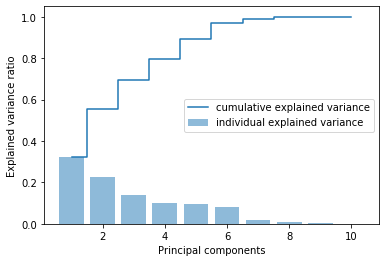

In [74]:
plt.bar(range(1,11), pca.explained_variance_ratio_, alpha = 0.5, align='center', label='individual explained variance')
plt.step( range(1,11), np.cumsum(pca.explained_variance_ratio_), where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [75]:
df_comp = pd.DataFrame(pca.components_,columns=list(X.columns.values))

In [77]:
df_comp

cement      slag       ash     water  superplastic  coarseagg   fineagg  \
0 -0.506786  0.216623  0.131999  0.231541     -0.170517  -0.004158  0.000589   
1  0.214197  0.127233 -0.437872  0.506548     -0.483680   0.037705 -0.398490   
2  0.080235  0.635174 -0.227201 -0.003862      0.325882  -0.645892 -0.041513   
3  0.038601 -0.383328  0.101109  0.241325     -0.055190  -0.549525  0.477770   
4  0.054694 -0.045669  0.602285  0.139233      0.322844  -0.097687 -0.634786   
5 -0.145506  0.286288 -0.214977 -0.384503      0.204989   0.317607  0.093739   
6 -0.043093  0.311821  0.419644 -0.402546     -0.684498  -0.198130  0.007051   
7  0.560653 -0.169575 -0.071373 -0.390506     -0.098565  -0.097181 -0.147351   
8  0.468798  0.420038  0.372286  0.373057      0.054820   0.346773  0.421397   
9 -0.359494 -0.005879  0.015680  0.102992     -0.015033   0.006151 -0.011871   

        age  wc_ratio  wb_ratio  
0  0.002229  0.540335  0.551495  
1  0.298582 -0.056677 -0.055526  
2 -0.104991  0.020882 -0.043859  
3  0.499129  0.018625  0.018538  
4  0.308502 -0.028880 -0.007602  
5  0.742082  0.014639  0.015057  
6  0.063435 -0.191491 -0.119298  
7  0.025029  0.672724  0.072580  
8  0.013455  0.130759 -0.088978  
9  0.000476  0.443475 -0.814126

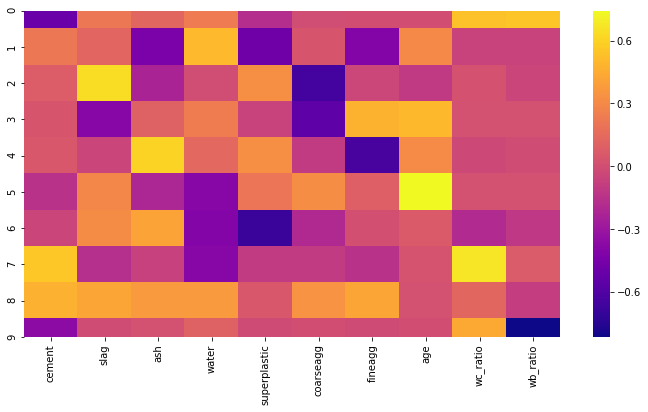

In [76]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma')

<br>
<br>
<br>
<br>

## Building the Model to check for feature importances

In [142]:
X = cm_df.drop(['strength'], axis = 1)
y = cm_df['strength']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.20 , random_state = 1)

In [144]:
X_train, X_val, y_train, y_val = train_test_split(X_train , y_train ,test_size = 0.25 , random_state = 1)

In [145]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(618, 10)
(206, 10)
(206, 10)


In [146]:
scale = StandardScaler() # Standard scaling
scale.fit(X_train.iloc[:,:])# fitting on training data so the data integrity in test is maintained

StandardScaler(copy=True, with_mean=True, with_std=True)

In [147]:
X_train.iloc[:,:] = scale.transform(X_train.iloc[:,:])
X_val.iloc[:,:] = scale.transform(X_val.iloc[:,:])
X_test.iloc[:,:] = scale.transform(X_test.iloc[:,:])

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [148]:
gbmTree = GradientBoostingRegressor(n_estimators=50)
gbmTree.fit(X_train,y_train)
print("gbmTree on training" , gbmTree.score(X_train, y_train))
print("gbmTree on test data ",gbmTree.score(X_val,y_val))
print("gbmTree on test data ",gbmTree.score(X_test,y_test))

gbmTree on training 0.9221144729738221
gbmTree on test data  0.8830770225897295
gbmTree on test data  0.8798721855021808


Text(0.5, 0, 'Relative Importance')

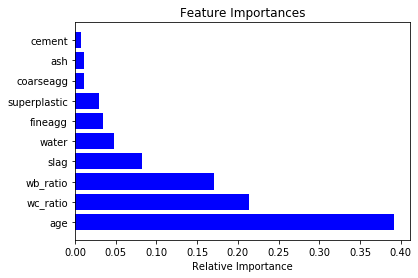

In [149]:
# View a list of the features and their importance scores
importances = gbmTree.feature_importances_
indices = np.argsort(importances)[::-1][:10]
a = cm_df.columns[:]
features= a.drop(['strength'],1)
#plot it
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [150]:
rfTree = RandomForestRegressor(n_estimators=50)
rfTree.fit(X_train,y_train)
print("rfTree on train data ", rfTree.score(X_train,y_train))
print("rfTree on test data ", rfTree.score(X_val,y_val))
print("gbmTree on test data ",gbmTree.score(X_test,y_test))

rfTree on train data  0.9847465514499
rfTree on test data  0.9085570734407855
gbmTree on test data  0.8798721855021808


Text(0.5, 0, 'Relative Importance')

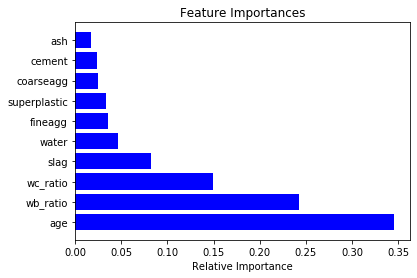

In [151]:
# View a list of the features and their importance scores
importances = rfTree.feature_importances_
indices = np.argsort(importances)[::-1][:10]
a = cm_df.columns[:]
features= a.drop(['strength'],1)
#plot it
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### Decided to drop below predictors based on multi-collinearity, Cluster analysis, PCA and feature imporatances 

### To use Train - Validation - Test Set of 3:1:1 ratio

In [152]:
X = cm_df.drop(['strength','coarseagg','ash','cement','wc_ratio'], axis = 1)
y = cm_df['strength']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X , y ,test_size = 0.20 , random_state = 1)

In [154]:
X_train, X_val, y_train, y_val = train_test_split(X_train , y_train ,test_size = 0.25 , random_state = 1)

In [155]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(618, 6)
(206, 6)
(206, 6)


In [156]:
scale = StandardScaler() # Standard scaling
scale.fit(X_train.iloc[:,:])# fitting on training data so the data integrity in test is maintained

StandardScaler(copy=True, with_mean=True, with_std=True)

In [157]:
X_train.iloc[:,:] = scale.transform(X_train.iloc[:,:])
X_val.iloc[:,:] = scale.transform(X_val.iloc[:,:])
X_test.iloc[:,:] = scale.transform(X_test.iloc[:,:])

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## To use order 1 complexity regression models of SVR, Random Forrest, Bagging & Gradient Boost

In [158]:
svreg = SVR()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
br = BaggingRegressor()

In [159]:
# Checking the hyperparameters present in the models for clarity
for clf, label in zip([svreg , rfr, gbr, br], ['svreg','rfr','gbr','br']):
    print("model name: " , label)
    print("\n model_hyperparameters \n" , clf.get_params() )


model name:  svreg

 model_hyperparameters 
 {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}
model name:  rfr

 model_hyperparameters 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
model name:  gbr

 model_hyperparameters 
 {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fract

## Time to use Grid Search & Random Search to fine tune models

## SVR using GridSearchCV

In [36]:
svreg_gs_param_grid = {
    'C' : [0.01, 0.1 , 1, 10,20, 30 , 50 , 100,200,400,500,1000],
    'gamma' : ['auto','scale'],
    'kernel' : ['poly','rbf']
}

In [37]:
# run grid search
grid_search = GridSearchCV(estimator=svreg, param_grid=svreg_gs_param_grid, cv=10)
#start = time()
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 20, 30, 50, 100, 200, 400, 500,
                               1000],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['poly', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [38]:
#Getting best parameters
grid_search.best_params_

{'C': 200, 'gamma': 'auto', 'kernel': 'rbf'}

In [39]:
print(grid_search.cv_results_['mean_test_score'])

[3.47988343e-02 7.61155575e-04 3.50470351e-02 7.55305034e-04
 1.84919640e-01 1.71759226e-01 1.84844203e-01 1.71705041e-01
 3.81188790e-01 6.10556029e-01 3.80649744e-01 6.10474439e-01
 4.60060221e-01 7.95294659e-01 4.58999950e-01 7.95301092e-01
 4.38518721e-01 8.11662285e-01 4.38249006e-01 8.11622606e-01
 4.22030213e-01 8.20872271e-01 4.21104451e-01 8.20639339e-01
 3.70494397e-01 8.31791377e-01 3.71013857e-01 8.31533111e-01
 3.27876416e-01 8.41667129e-01 3.28991611e-01 8.41528267e-01
 3.06526649e-01 8.46303692e-01 3.06906034e-01 8.46021978e-01
 2.88475541e-01 8.40898420e-01 2.89172289e-01 8.40646366e-01
 2.81522938e-01 8.35630796e-01 2.80609053e-01 8.35444315e-01
 2.64387668e-01 8.16674276e-01 2.64131605e-01 8.15228184e-01]


In [40]:
grid_search.best_estimator_

SVR(C=200, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [162]:
svregressor = SVR( C=200, gamma='auto')
svregressor.fit(X_train, y_train)
print("SVR on train data ", svregressor.score(X_train,y_train))
print("SVR on validation data ", svregressor.score(X_val,y_val))
print("SVR on test data ", svregressor.score(X_test,y_test))

SVR on train data  0.9255483735044082
SVR on validation data  0.8817806614945835
SVR on test data  0.8784998667967238


## Random Forrest Regression using GridSearchCV

In [44]:
rfr_gs_param_grid = {
    'n_estimators' : [10, 50, 100, 200],
    'max_depth': range(5,10),
    'criterion': ['mse','mae'],
    'min_samples_leaf' : range(1,4),
    'max_features':['auto','sqrt']
}

In [45]:
# run grid search
grid_search = GridSearchCV(estimator=rfr, param_grid=rfr_gs_param_grid, cv=10)
#start = time()
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_j

In [46]:
# Getting the nest parameters
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 50}

In [163]:
rfTree = RandomForestRegressor(n_estimators=50, max_depth=11, max_features='auto',min_samples_leaf=1, criterion='mse')
rfTree.fit(X_train,y_train)
print("Random Forrest on train data ", rfTree.score(X_train,y_train))
print("Random Forrest on validation data ", rfTree.score(X_val,y_val))
print("Random Forrest on validation data ", rfTree.score(X_test,y_test))

Random Forrest on train data  0.9803517724084108
Random Forrest on validation data  0.9009933563226278
Random Forrest on validation data  0.9096718884175511


## Graddient Boost Regression Regression using GridSearchCV

In [63]:
gbr_gs_param_grid = {
    'n_estimators' : [50, 100],
    'max_depth': range(5,10),
    'criterion': ['mse','mae'],
    'min_samples_leaf' : range(1,4),
    'max_features':['auto','sqrt'],
    'learning_rate' : [0.001, 0.01, 0.05,0.1]
}

In [64]:
# run grid search
grid_search = GridSearchCV(estimator=gbr, param_grid=gbr_gs_param_grid, cv=10)
#start = time()
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_...
                            

In [65]:
# Getting the best parameters
grid_search.best_params_

{'criterion': 'mse',
 'learning_rate': 0.1,
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'n_estimators': 100}

In [164]:
gbmTree = GradientBoostingRegressor(n_estimators=100, criterion='mse', learning_rate=0.1, max_depth=6, max_features='sqrt',
                                    min_samples_leaf=3)
gbmTree.fit(X_train,y_train)
print("Gradient Boost on training data" , gbmTree.score(X_train, y_train))
print("Gradient Boost on validation data ",gbmTree.score(X_val,y_val))
print("Gradient Boost on test data ",gbmTree.score(X_test,y_test))

Gradient Boost on training data 0.9906563372330728
Gradient Boost on validation data  0.9193656757998036
Gradient Boost on test data  0.9247859092279108


## Bagging Regression using GridSearchCV

In [26]:
br_gs_param_grid = {
    'n_estimators' : [50, 100, 200, 400, 500, 1000],
    'max_features':range(1,6),
    'bootstrap':[True, False]
}

In [27]:
# run grid search
grid_search = GridSearchCV(estimator=br, param_grid=br_gs_param_grid, cv=10)
#start = time()
grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [70]:
# Getting the best parameters
grid_search.best_params_

{'bootstrap': True, 'max_features': 5, 'n_estimators': 500}

In [ ]:
print(grid_search.cv_results_['mean_test_score'])

In [165]:
bgcl = BaggingRegressor(n_estimators=500, bootstrap= True, max_features=5)
bgcl = bgcl.fit(X_train,y_train)
print("bgcl on train data ", bgcl.score(X_train,y_train))
print("bgcl on validation data ", bgcl.score(X_val,y_val))
print("bgcl on test data ", bgcl.score(X_test,y_test))
#print("out of bag score" , bgcl.oob_score_)

bgcl on train data  0.9715665325089957
bgcl on validation data  0.8761931966489279
bgcl on test data  0.8896196337416095


## Bagging Regression using Random SearchCV

In [166]:
svreg = SVR()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
br = BaggingRegressor()

In [167]:
br_rs_param_grid = {
    'n_estimators' : [50, 100, 200, 400, 500, 1000],
    'max_features':range(1,6),
    'bootstrap':[True, False]
}

In [168]:
# run randomized search
samples = 60  # number of random samples 
randomCV = RandomizedSearchCV(br, param_distributions=br_rs_param_grid, n_iter=samples) #default cv = 3

In [169]:
randomCV.fit(X_train, y_train)

 
print(randomCV.best_params_)

{'n_estimators': 1000, 'max_features': 5, 'bootstrap': True}


In [186]:
bgcl = BaggingRegressor(n_estimators=500, bootstrap= True, max_features=5)
bgcl = bgcl.fit(X_train,y_train)
print("bgcl on train data ", bgcl.score(X_train,y_train))
print("bgcl on test data ", bgcl.score(X_val,y_val))
print("bgcl on test data ", bgcl.score(X_test,y_test))
#print("out of bag score" , bgcl.oob_score_)

bgcl on train data  0.9759246663040058
bgcl on test data  0.8859127871413491
bgcl on test data  0.8941688407578552


## Gradient Boost Regression Regression using Random SearchCV

In [170]:
gbr_rs_param_grid = {
    'n_estimators' : [50, 100, 200, 400, 500, 1000],
    'max_depth': range(4,7),
    'criterion': ['mse','mae'],
    'min_samples_leaf' : sp_randint(1, 8),
    'max_features':sp_randint(1,6),
    'loss' : ['ls', 'lad', 'huber', 'quantile'],
    'learning_rate' : [0.001, 0.01, 0.05,0.1, 0.2,0.3]
}

In [171]:
# run randomized search
samples = 1500  # number of random samples 
randomCV = RandomizedSearchCV(gbr, param_distributions=gbr_rs_param_grid, n_iter=samples) #default cv = 3

In [172]:
randomCV.fit(X_train, y_train)

 
print(randomCV.best_params_)

{'criterion': 'mse', 'learning_rate': 0.05, 'loss': 'huber', 'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 7, 'n_estimators': 1000}


In [174]:
gbmTree = GradientBoostingRegressor( criterion='mse', learning_rate = 0.05, loss= 'huber', max_depth= 5, 
                                    max_features= 2, min_samples_leaf= 7, n_estimators= 1000)
gbmTree.fit(X_train,y_train)
print("gbmTree on training" , gbmTree.score(X_train, y_train))
print("gbmTree on validation data ",gbmTree.score(X_val,y_val))
print("gbmTree on test data ",gbmTree.score(X_test,y_test))

gbmTree on training 0.9911083970930431
gbmTree on validation data  0.9297078867084143
gbmTree on test data  0.93635651472253


## Random Forrest Regression using Random SearchCV

In [180]:
rfr_rs_param_grid = {
    'n_estimators' : [50, 100, 200, 400, 500, 1000],
    'max_depth': range(5,10),
    'criterion': ['mse','mae'],
    'min_samples_leaf' : sp_randint(1, 5),
    'max_features':sp_randint(1, 6)
}

In [181]:
# run randomized search
samples = 1000  # number of random samples 
randomCV = RandomizedSearchCV(rfr, param_distributions=rfr_rs_param_grid, n_iter=samples) #default cv = 3

In [182]:
randomCV.fit(X_train, y_train)

 
print(randomCV.best_params_)

{'criterion': 'mse', 'max_depth': 9, 'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 500}


In [183]:
rfTree = RandomForestRegressor(n_estimators=500, max_depth=9, max_features=5 ,min_samples_leaf=1, criterion='mse')
rfTree.fit(X_train,y_train)
print("rfTree on train data ", rfTree.score(X_train,y_train))
print("rfTree on validation data ", rfTree.score(X_val,y_val))
print("rfTree on test data ", rfTree.score(X_test,y_test))

rfTree on train data  0.9744523764583404
rfTree on validation data  0.9056178097487761
rfTree on test data  0.9026463591610014


## SVR using Random SearchCV

In [179]:
svreg_rs_param_grid = {
    'C' : [0.01, 0.1 , 1, 10,20, 30 , 50 , 100, 200, 300, 500],
    'gamma' : [0.01, 0.1,0.05,0.5,1,10,20, 'auto', 'scale']
}

In [60]:
# run randomized search
samples = 99  # number of random samples 
randomCV = RandomizedSearchCV(svreg, param_distributions=svreg_rs_param_grid, n_iter=samples) #default cv = 3

In [61]:
randomCV.fit(X_train, y_train)

 
print(randomCV.best_params_)

{'gamma': 0.1, 'C': 500}


In [185]:
svregressor = SVR( C=500, gamma=0.1)
svregressor.fit(X_train, y_train)
print("SVR on train data ", svregressor.score(X_train,y_train))
print("SVR on validation data ", svregressor.score(X_val,y_val))
print("SVR on test data ", svregressor.score(X_test,y_test))

SVR on train data  0.9189461858661077
SVR on validation data  0.885118145616623
SVR on test data  0.8769309533239076


In [252]:
y_test

339    47.78
244    48.79
882    33.70
567    18.28
923    14.99
       ...  
258    42.29
551    49.77
528    32.40
812    24.66
50     49.25
Name: strength, Length: 206, dtype: float64

<br>
<br>
<br>
<br>

## Gradient Boosting is the model to rely on as it gives better R2 results

## Take a look at the feature importances

Text(0.5, 0, 'Relative Importance')

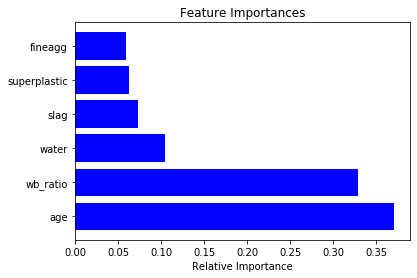

In [264]:
# View a list of the features and their importance scores
importances = gbmTree.feature_importances_
indices = np.argsort(importances)[::-1][:6]
a = cm_df.columns[:]
features= a.drop(['strength','coarseagg','ash','cement','wc_ratio'],1)
#plot it
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

<br>
<br>

## Bootstrap Sampling

In [253]:
Xdf = cm_df.drop(['coarseagg','ash','cement','wc_ratio'], axis = 1)

In [254]:
strength = Xdf['strength']
Xdf.drop(labels=['strength'], axis=1, inplace=True)
Xdf.insert(6,'strength',strength )

In [255]:
scale = StandardScaler() # Standard scaling
scale.fit(Xdf.iloc[:,:-1])# fitting on training data so the data integrity in test is maintained

StandardScaler(copy=True, with_mean=True, with_std=True)

In [256]:
Xdf.iloc[:,:-1] = scale.transform(Xdf.iloc[:,:-1])

In [257]:
Xdf.head()

slag     water  superplastic   fineagg       age  wb_ratio  strength
0  1.623619  1.039191     -1.070393 -0.312220 -0.279733  1.862131     29.89
1 -0.367670 -1.099900      0.812800  0.287507 -0.501465  0.755956     23.51
2 -0.862561  0.277258     -0.111360  1.104745 -0.279733  0.180374     29.22
3  0.474347  2.198654     -1.070393 -1.299192 -0.279733  0.524486     45.85
4  1.288219  0.556475      0.516371 -0.963496 -0.279733  1.499312     18.29

In [258]:
val = Xdf.values

In [259]:
len(Xdf)

1030

In [260]:
val

array([[ 1.62361886,  1.03919055, -1.0703929 , ..., -0.27973311,
         1.86213089, 29.89      ],
       [-0.36767014, -1.09990047,  0.81279977, ..., -0.50146528,
         0.75595577, 23.51      ],
       [-0.86256058,  0.27725769, -0.1113596 , ..., -0.27973311,
         0.18037422, 29.22      ],
       ...,
       [ 0.49780176, -0.09187749,  0.48149736, ..., -0.27973311,
        -0.17916054, 44.28      ],
       [-0.41692464,  2.1986536 , -1.0703929 , ...,  3.55306569,
        -0.11532026, 55.06      ],
       [-0.86256058, -0.40422264, -1.0703929 , ..., -0.61233136,
        -1.75140176, 52.61      ]])

In [261]:
# configure bootstrap
n_iterations = 1000              # Number of bootstrap samples to create
n_size = int(len(Xdf) * 0.70)    # picking only 50 % of the given data in every bootstrap sample

# run bootstrap
stats = list()
for i in range(n_iterations):
	# prepare train and test sets
	train = resample(val, n_samples=n_size)  # Sampling with replacement 
	test = np.array([x for x in val if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
	model = GradientBoostingRegressor( criterion='mse', learning_rate = 0.05, loss= 'huber', max_depth= 5, 
                                    max_features= 2, min_samples_leaf= 7, n_estimators= 1000)
	model.fit(train[:,:-1], train[:,-1])
    # evaluate model
	#predictions = model.predict(test[:,:-1])
	score = model.score(test[:,:-1], test[:,-1])    # caution, overall accuracy score can mislead when classes are imbalanced
	print(score)
	stats.append(score)

0.909245264111418
0.9214779856058664
0.9087612709686288
0.9201737493571467
0.9194740071411399
0.9211995212803537
0.8945261949280091
0.919182288348529
0.9120475636682105
0.9131412638797309
0.8819480004975356
0.9085261331781126
0.9042957509902821
0.9189335272959871
0.9036857819071018
0.9042796037593975
0.9277029019526807
0.9194891796111914
0.906280105163146
0.9075383053554626
0.9047175337107822
0.9234987408823416
0.9163511514173733
0.9094958952117508
0.9145577869969066
0.9197281277637607
0.9083466604437898
0.9141654469044762
0.9062645736961847
0.901044335773415
0.9058415920552297
0.9164307083425817
0.9063428960608313
0.9245028937198271
0.899654617932296
0.9253466469535724
0.901322977484797
0.8922192322611346
0.9187652161475461
0.9088059647389215
0.9055584914002008
0.9138158164570189
0.9106710207768386
0.9015557734158227
0.9089448484100997
0.9234504275927775
0.9133019784731741
0.9216112562142522
0.8987414727853652
0.9195602355648165
0.9177184554098065
0.924247157277586
0.9140155930886867


0.914319031235361
0.9128422299945745
0.9137776404295339
0.9182438049886006
0.8986093965502369
0.8969748297058392
0.9207934702848232
0.9184456723148756
0.9109056566689371
0.9168982912899075
0.8951392400820444
0.8986426297650951
0.8848261038075399
0.9060930099542154
0.9193668661288867
0.9004155959328449
0.9199210386226295
0.9177263329975087
0.9088590775609429
0.902875460249938
0.9221404523125067
0.9124387963935758
0.9178781612322892
0.8879834201450238
0.9245227459626477
0.9139510215521376
0.904173725246754
0.9202405928588339
0.9195918065518478
0.9045052059614291
0.918044002106686
0.9238619220092655
0.9294834560917485
0.9330471609911847
0.9052949700659043
0.9070614965864949
0.9192988335170238
0.9141113532534849
0.9040656448725807
0.9066634732720759
0.9095072892278072
0.9115156923663733
0.907895504519659
0.9247307130672069
0.9105778947935521
0.9131398381777693
0.8876650207634028
0.9011946079630933
0.8955964741791966
0.9079616884923731
0.9346975377556167
0.9283076787572889
0.925952477026955

0.9066529044207461
0.9126378336426446
0.9022190328313895
0.9048582851433752
0.8902331303659933
0.913262545609802
0.9097654255822387
0.8902473235372611
0.9138077608564971
0.9064392719140416
0.9127129786625909
0.919906076920874
0.9144391715051967
0.9069381468080764
0.9201244863914028
0.9277054256356005
0.9119297879649083
0.9069058466404699
0.916175702540985
0.911938904715726
0.9161706668661923
0.9091186400323102
0.8996926522603936
0.9271773748043721
0.9115152346622996
0.8996651295460735
0.9050965972266762
0.9000562196830221
0.8890990121154885
0.9246571820854463
0.9209209036546548
0.9122457838112263
0.9221973562893714
0.9378582857866219
0.9109541574797994
0.9147279961377968
0.9146010202097627
0.9146499225174637
0.9046084105026524
0.9182230304367818
0.9004661419670387
0.9196369343406113
0.9066873056057583
0.9129956548515373
0.902115097152176
0.9163485325403025
0.9200311114921381
0.9124435306476311
0.9028368461124139
0.8894880576673069
0.9122650377040338
0.9060519464427272
0.925690262138916

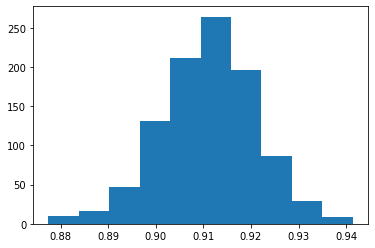

95.000 confidence interval 88.948% and 93.078%


In [263]:
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.3f confidence interval %.3f%% and %.3f%%' % (alpha*100, lower*100, upper*100))

<br>
<br>

## K-Fold Cross Validation

In [187]:
X = cm_df.drop(['strength','coarseagg','ash','cement','wc_ratio'], axis = 1)
y = cm_df['strength']

In [188]:
X.apply(zscore)

slag     water  superplastic   fineagg       age  wb_ratio
0     1.623619  1.039191     -1.070393 -0.312220 -0.279733  1.862131
1    -0.367670 -1.099900      0.812800  0.287507 -0.501465  0.755956
2    -0.862561  0.277258     -0.111360  1.104745 -0.279733  0.180374
3     0.474347  2.198654     -1.070393 -1.299192 -0.279733  0.524486
4     1.288219  0.556475      0.516371 -0.963496 -0.279733  1.499312
...        ...       ...           ...       ...       ...       ...
1025 -0.862561 -0.072947      0.673304  0.398148 -0.279733  1.666996
1026 -0.862561 -1.880763      3.009858  1.513364 -0.675683 -2.083786
1027  0.497802 -0.091877      0.481497 -0.063277 -0.279733 -0.179161
1028 -0.416925  2.198654     -1.070393 -1.299192  3.553066 -0.115320
1029 -0.862561 -0.404223     -1.070393 -2.015847 -0.612331 -1.751402

[1030 rows x 6 columns]

## Using whole dataset for K-Fold Validation

In [189]:

kfold = KFold(n_splits=10)
model = GradientBoostingRegressor( criterion='mse', learning_rate = 0.05, loss= 'huber', max_depth= 5, 
                                    max_features= 2, min_samples_leaf= 7, n_estimators= 1000)
results = cross_val_score(model, X, y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.90491341 0.94436604 0.96851674 0.94776957 0.90254233 0.95842333
 0.9517671  0.95685998 0.95863712 0.93096004]
Accuracy: 94.248% (2.158%)


In [190]:
# To find interval at 95% confidence
std95 = results.std() * 1.96
min_interval = results.mean() - std95
max_interval = results.mean() + std95

In [195]:
print('We can inform the stakeholders that the model can be said to perform between {min:.3f}% & {max:.3f}% at 95% confidence'.
      format(min = min_interval*100.0, max = max_interval*100.0))

We can inform the stakeholders that the model can be said to perform between 90.018% & 98.477% at 95% confidence


<br>
<br>
<br>
<br>

## KFold CV gives better results for stakeholders